# Passing Feature Exploration

Exploratory Data Analysis of features related to passing.

In [3]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


### Passes Completed, Passes Attempted and Progressive Passes

This set of features captures information related to passing. In general, we don't expect there to be any significant relationship between these features and goals scored. 

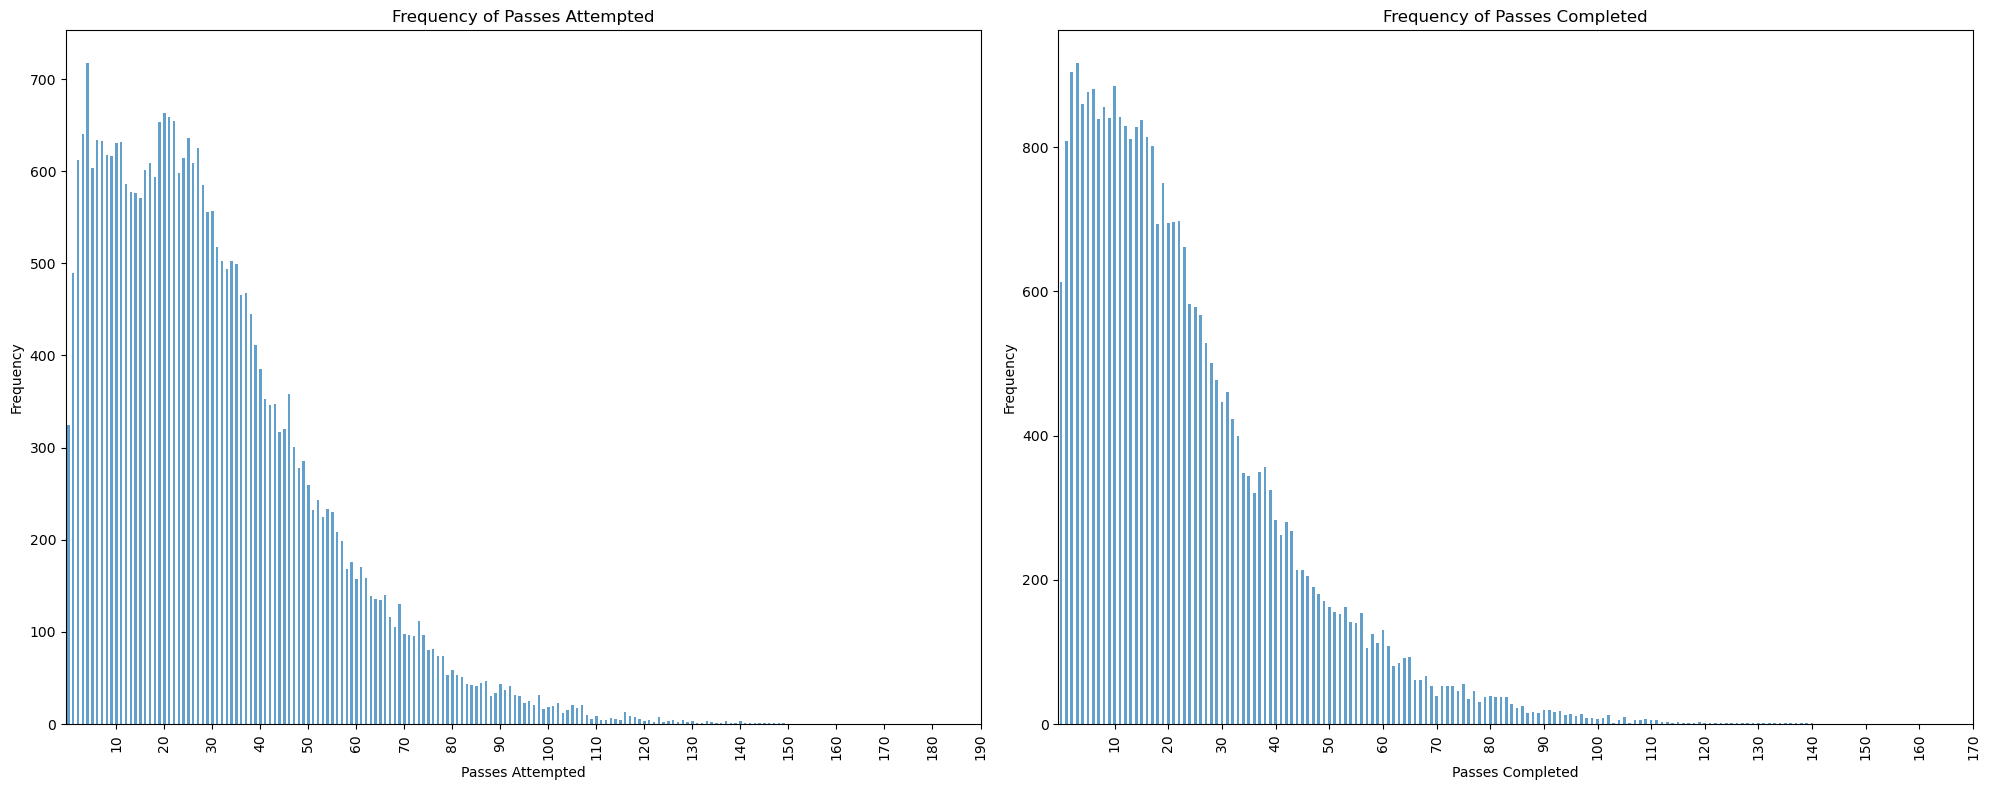

In [5]:
passcomp_count = att_explore['Passes Completed'].value_counts().sort_index()
passatt_count = att_explore['Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

passatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 200, 10))
ax1.set_xticklabels(range(10, 200, 10))


passcomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 180, 10))
ax2.set_xticklabels(range(10, 180, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

Both 'Passes Attempted' and 'Passes Completed' are skewed towards the right, with majority of the observations having less than 100 Passes Attempted and Passes Completed. We can quickly compute 'Pass Completion Percentage' by dividing 'Passes Completed' by 'Passes Attempted. 

In [6]:
att_explore['Pass Completion Percentage'] = (att_explore['Passes Completed']/att_explore['Passes Attempted'])*100

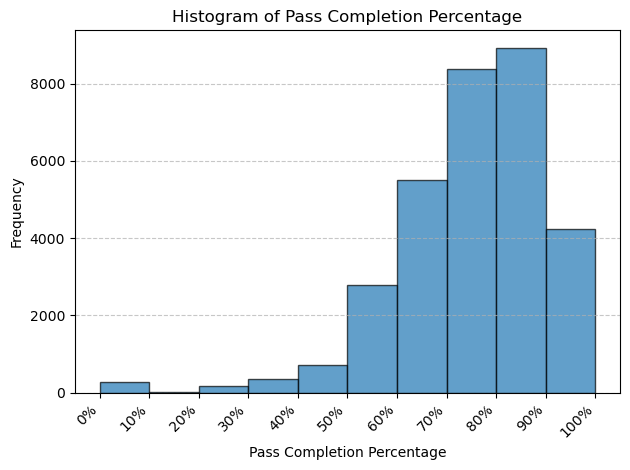

In [7]:
# Create the histogram
fig, ax = plt.subplots()

# Define the bins
bins = np.arange(0, 101, 10)  # 0, 10, 20, ..., 100

# Plot the histogram
ax.hist(att_explore['Pass Completion Percentage'], bins=bins, edgecolor='black', alpha=0.7)

# Customize the plot
ax.set_xlabel('Pass Completion Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pass Completion Percentage')

# Set x-axis ticks and labels
ax.set_xticks(bins)
ax.set_xticklabels([f'{x}%' for x in bins])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Let's now make a boxplot of Pass Completion Percentage for different Goals Scored values. 

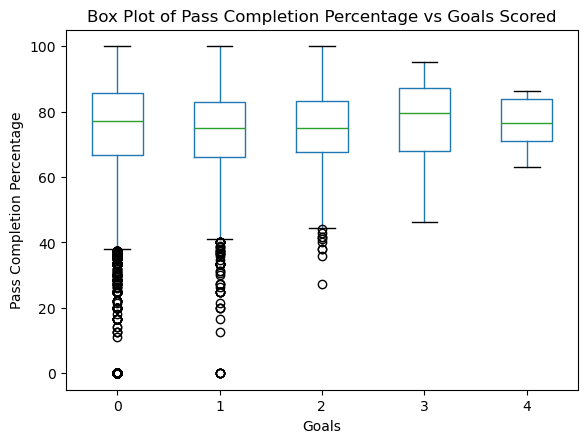

In [8]:
plt.figure
att_explore.boxplot(column = 'Pass Completion Percentage', by = 'Goals', grid = False)
plt.title('Box Plot of Pass Completion Percentage vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Pass Completion Percentage')
plt.show()

The plot above shows that the median Pass Completion Percentage is pretty much the same (at just under 80%) regardless of the number of goals scored. We can also have a look at similar plots that visualise the relationship between goals and Passes Completed/Passes Attempted. 

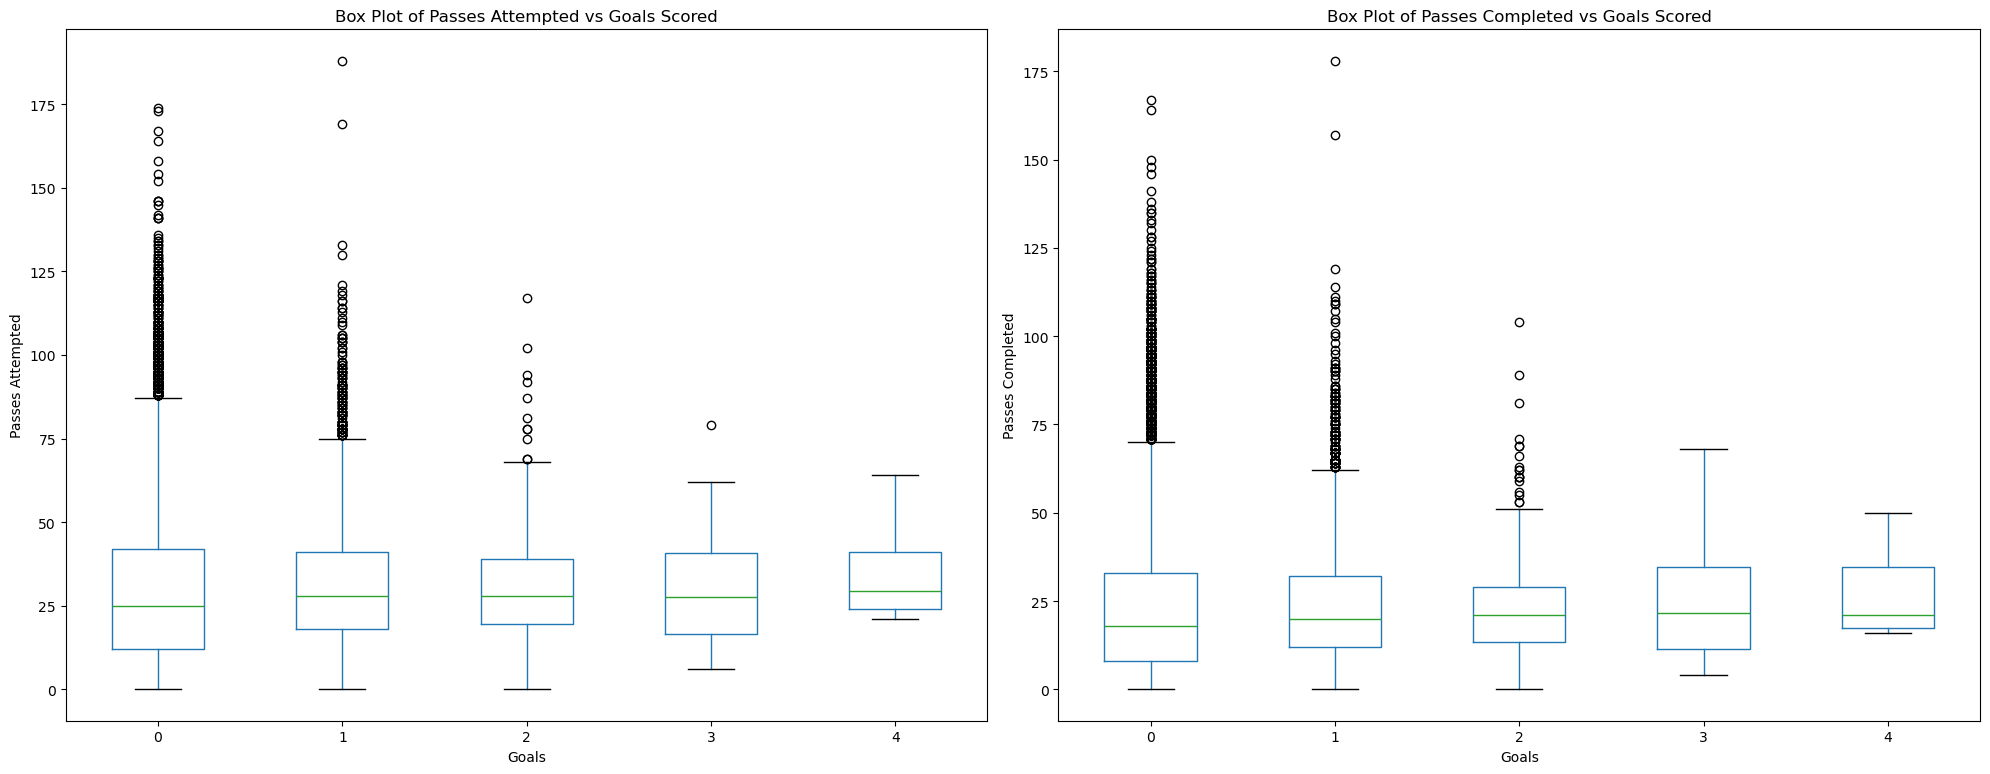

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Passes Attempted')

att_explore.boxplot(column = 'Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

The two boxplots above show us that the median value for Passes Attempted and Passes Completed are pretty much the same regardless of the number of goals scored. As seen in the previous plot, we are quite confident that there isn't any strong relationship between goals scored and passes attempted/passes completed/pass completion percentage. 

We now take a look at the 'Passing Distance' feature. 

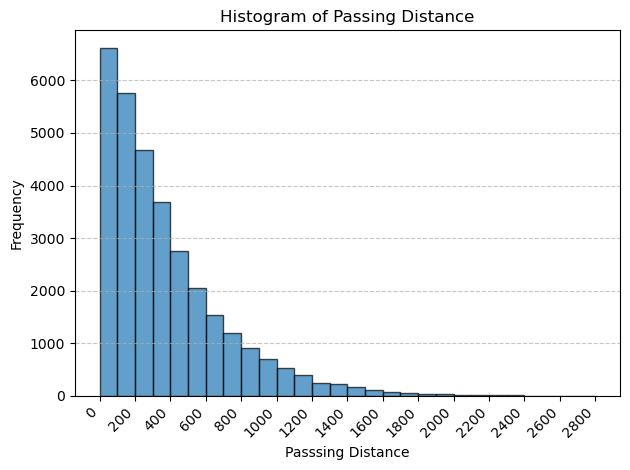

In [10]:
passdist_count = att_explore['Passing Distance'].value_counts().sort_index()

# Create the histogram
fig, ax = plt.subplots()

# Define the bins
bins = np.arange(0, 2900, 100)  # 0, 10, 20, ..., 100

# Plot the histogram
ax.hist(att_explore['Passing Distance'], bins=bins, edgecolor='black', alpha=0.7)

# Customize the plot
ax.set_xlabel('Passsing Distance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Passing Distance')

# Set x-axis ticks and labels
ax.set_xticks(bins[::2])
ax.set_xticklabels([f'{x}' for x in bins[::2]])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Once again, the 'Passing Distance' feature is clearly right-skewed. We now look at the relationship between Goals and Passing Distance. 

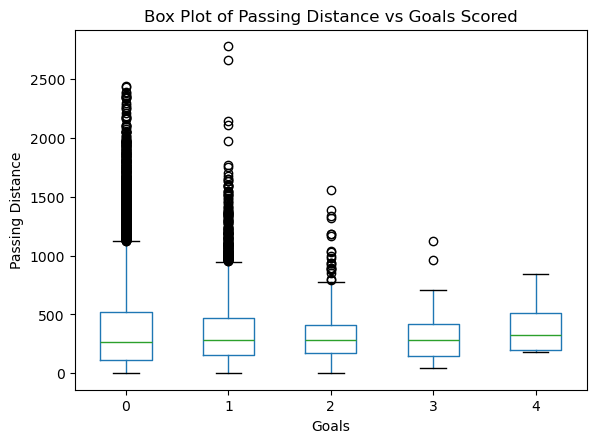

In [11]:
plt.figure
att_explore.boxplot(column = 'Passing Distance', by = 'Goals', grid = False)
plt.title('Box Plot of Passing Distance vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passing Distance')
plt.show()

Again, we see that there isn't a relationship between Passing Distance and Goals. The median value is quite similar regardless of the number of goals scored.

#### Progressive Passing

A progressive pass is defined as a forward pass that advances a team significantly closer to the opponent's goal. Specific definitions apply based on the starting and finishing positions of the pass. More information is available here: https://dataglossary.wyscout.com/progressive_pass/#:~:text=A%20forward%20pass%20that%20attempts,closer%20to%20the%20opponent's%20goal.

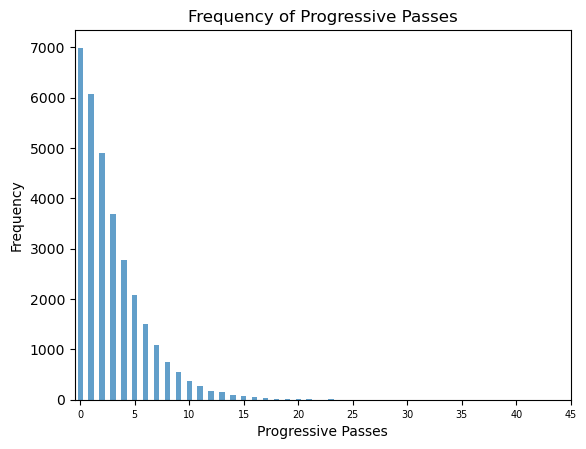

In [12]:
prgpass_count = att_explore['Progressive Passes'].value_counts().sort_index()

fig, ax = plt.subplots()

prgpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Progressive Passes')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Progressive Passes')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 50, 5))
ax.set_xticklabels(range(0, 50, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

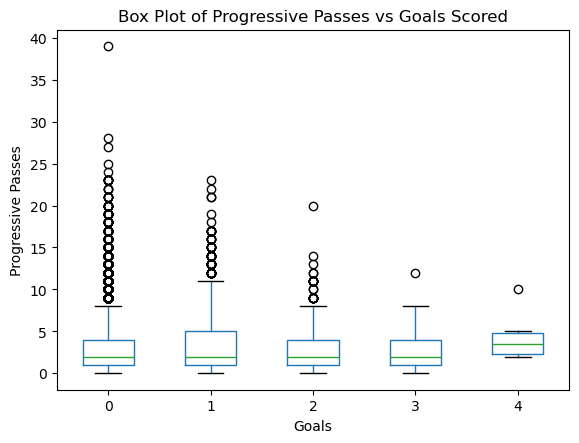

In [13]:
plt.figure
att_explore.boxplot(column = 'Progressive Passes', by = 'Goals', grid = False)
plt.title('Box Plot of Progressive Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Progressive Passes')
plt.show()

Again, similar result where we don't really see a relationship between the number of goals scored and the median number of Progressive Passes. 

We now have a look at 'Progressive Passing Distance'. We don't expect there to be any relationship between this, we can first visualise the relationship between 'Progressive Passes' and 'Progressive Passing Distance' with a scatter plot.

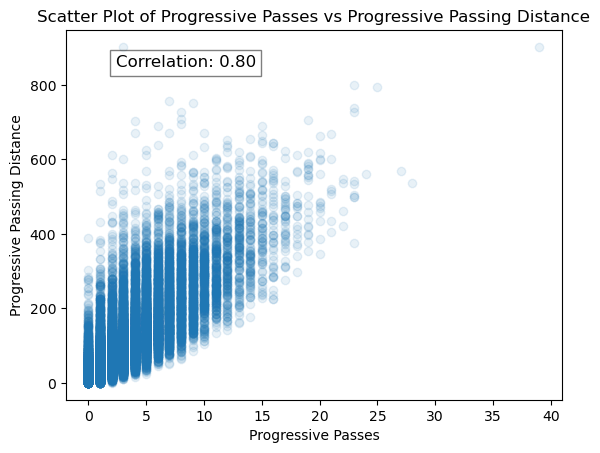

In [14]:
#calculate the correlation
correlation = att_explore['Progressive Passes'].corr(att_explore['Progressive Passing Distance'])

plt.figure()
plt.scatter(att_explore['Progressive Passes'], att_explore['Progressive Passing Distance'], alpha=0.1)
plt.title(f'Scatter Plot of Progressive Passes vs Progressive Passing Distance')
plt.xlabel('Progressive Passes')
plt.ylabel('Progressive Passing Distance')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

The plot above suggests that there is a positive relationship between Progressive Passes and Progressive Passing Distance. The more progressive passes recorded, the greater the progressive passing distance. This makes a lot of intuitive sense. There are a few outliers however. For example, there is a noticeable one located in the top left of the plot. 

In [15]:
att_explore.loc[[25535]][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played', 'Progressive Passes', 'Progressive Passing Distance']]

,Venue,Result,Team,Opponent,Position,Minutes Played,Progressive Passes,Progressive Passing Distance
25535,Away,W 2–1,Manchester City,Sheffield Utd,FW,90,0,6


This observation recorded a progressive passing distance of 901 with only 3 progressive passes. Although this may appear to be impossible (how can each progressive pass average a distance of 300 yards if the pitch is only 100 yards long), this can explained by the fact that passes not recorded as progressive passes are still counted when calculating the progressive passing distance. Therefore, a lot of short forward passes that don't travel enough distance to be recorded as a progressive pass will simultaneously not be recorded as a progressive pass, yet contribute to the progressive passing distance. 

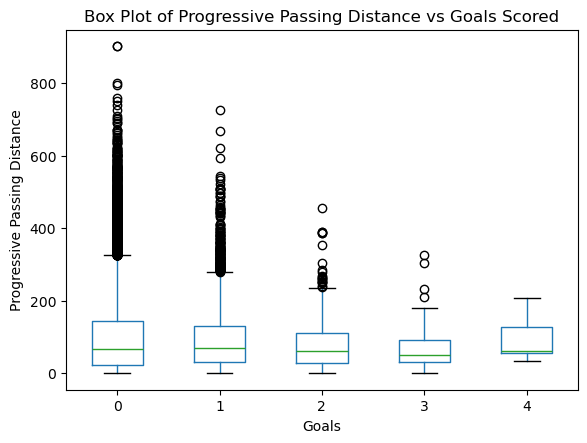

In [16]:
plt.figure
att_explore.boxplot(column = 'Progressive Passing Distance', by = 'Goals', grid = False)
plt.title('Box Plot of Progressive Passing Distance vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Progressive Passing Distance')
plt.show()

Here, we see quite a similar plot to above. We can conclude that there is probably no relationship between Progressive Passing Distance and Goals Scored. 

#### Short/Medium/Long Passes

The above analysis allowed us to conclude that there is likely no relationship between pass completion (and analogously passes attempted/passes completed) and goals scored. We expect to see similar when looking at the relationship between short/medium/long passes and goals scored.  

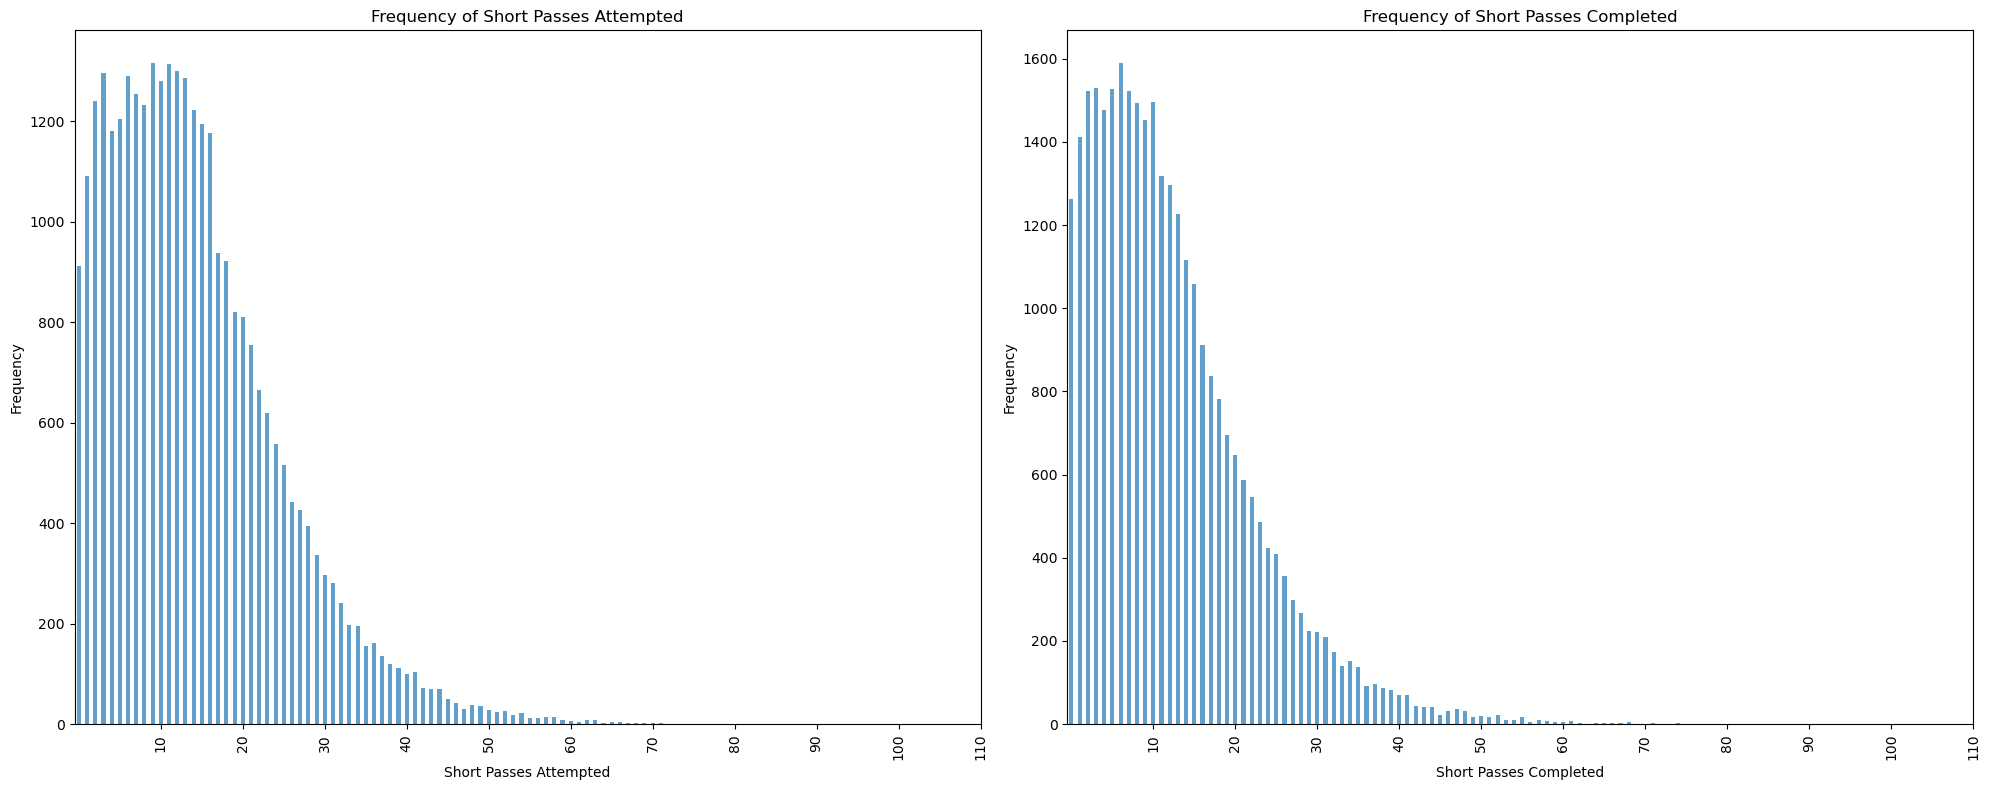

In [17]:
shortpasscomp_count = att_explore['Short Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Short Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Short Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Short Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 120, 10))
ax1.set_xticklabels(range(10, 120, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Short Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Short Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 120, 10))
ax2.set_xticklabels(range(10, 120, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

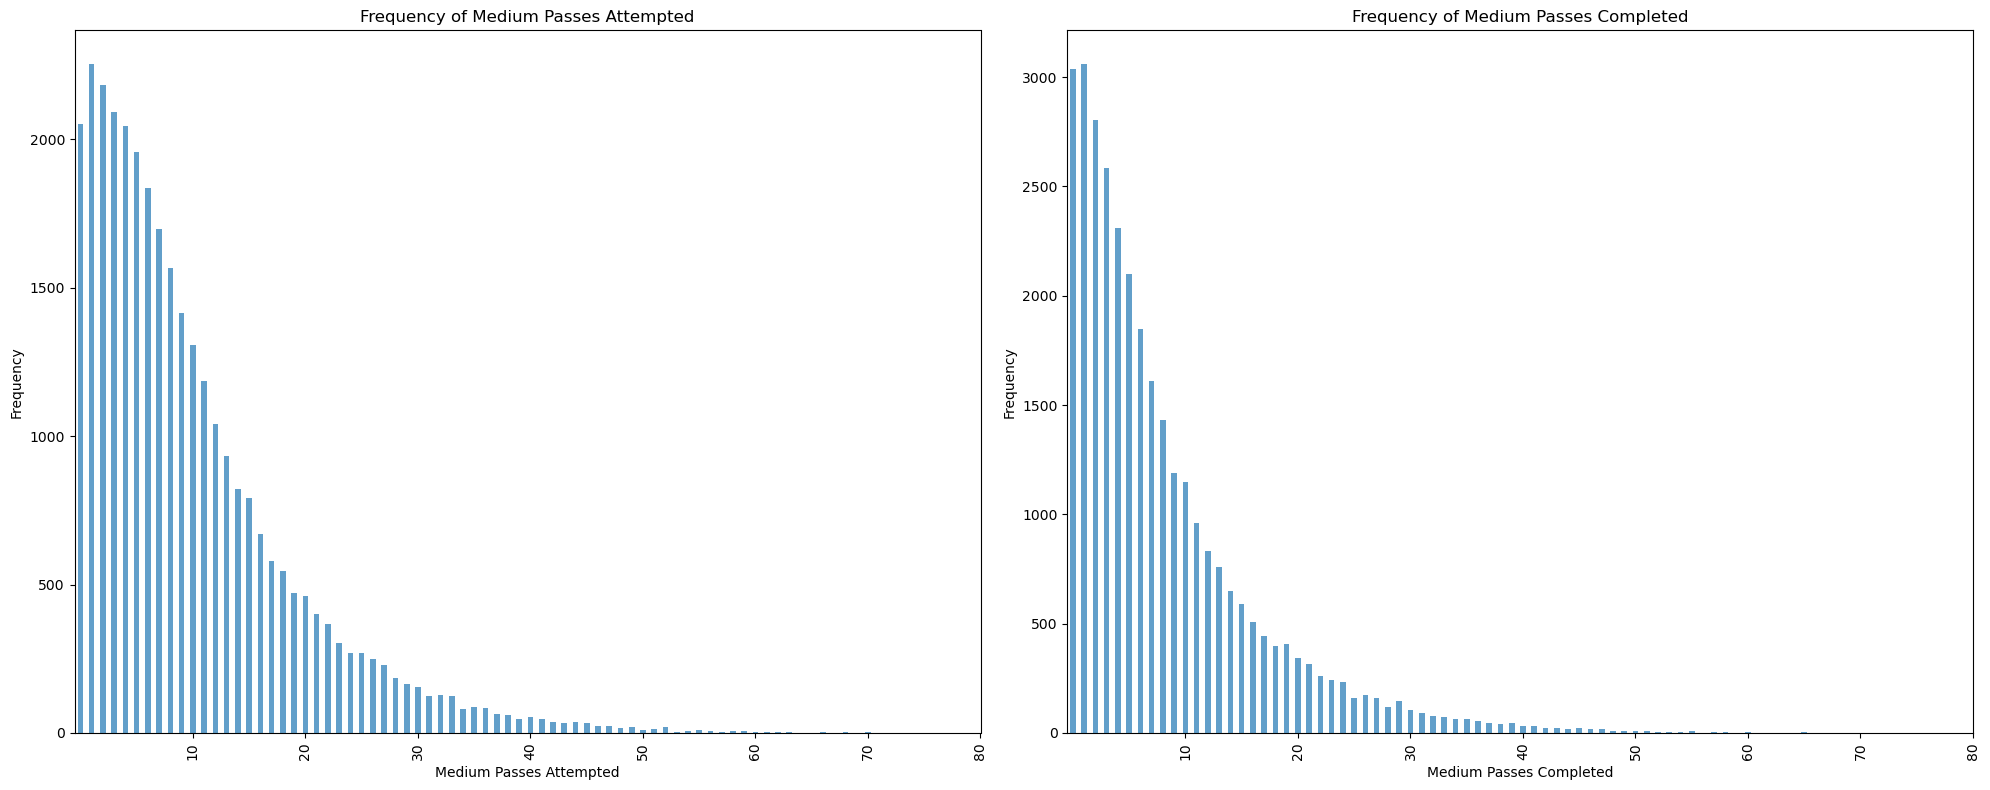

In [18]:
shortpasscomp_count = att_explore['Medium Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Medium Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Medium Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Medium Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 90, 10))
ax1.set_xticklabels(range(10, 90, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Medium Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Medium Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 90, 10))
ax2.set_xticklabels(range(10, 90, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

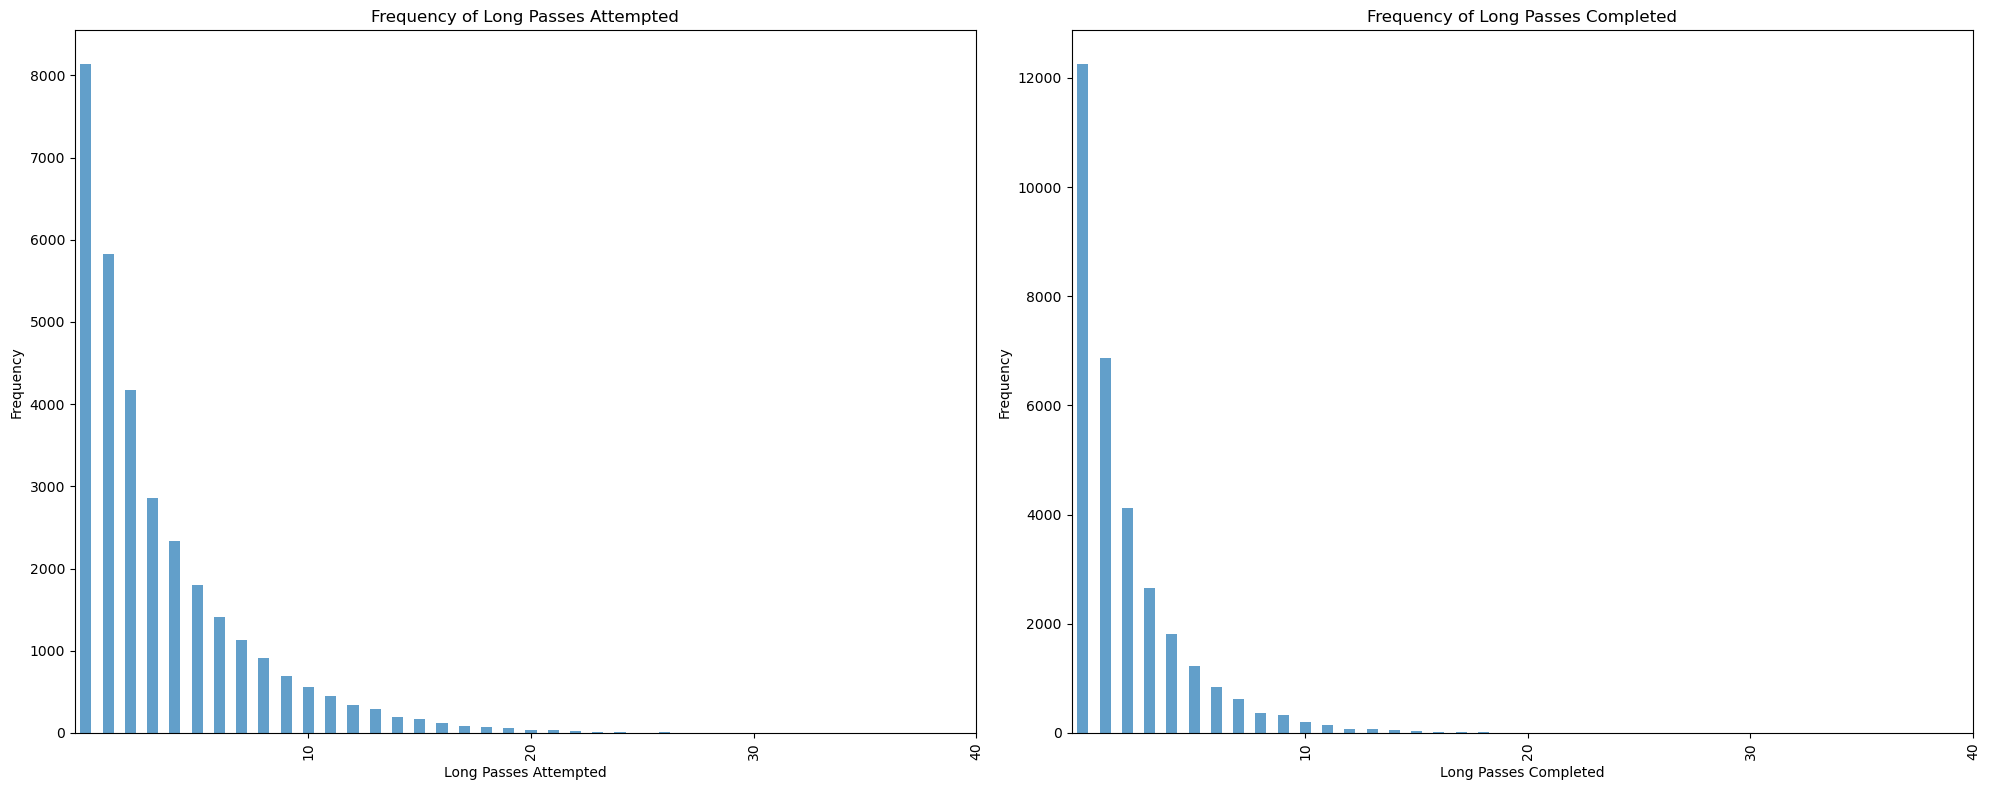

In [19]:
shortpasscomp_count = att_explore['Long Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Long Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Long Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Long Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 50, 10))
ax1.set_xticklabels(range(10, 50, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Long Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Long Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 50, 10))
ax2.set_xticklabels(range(10, 50, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

We can see that the frequency of short/medium/long passes completed/attempted are quite similar to the frequency of passes completed/attempted. 

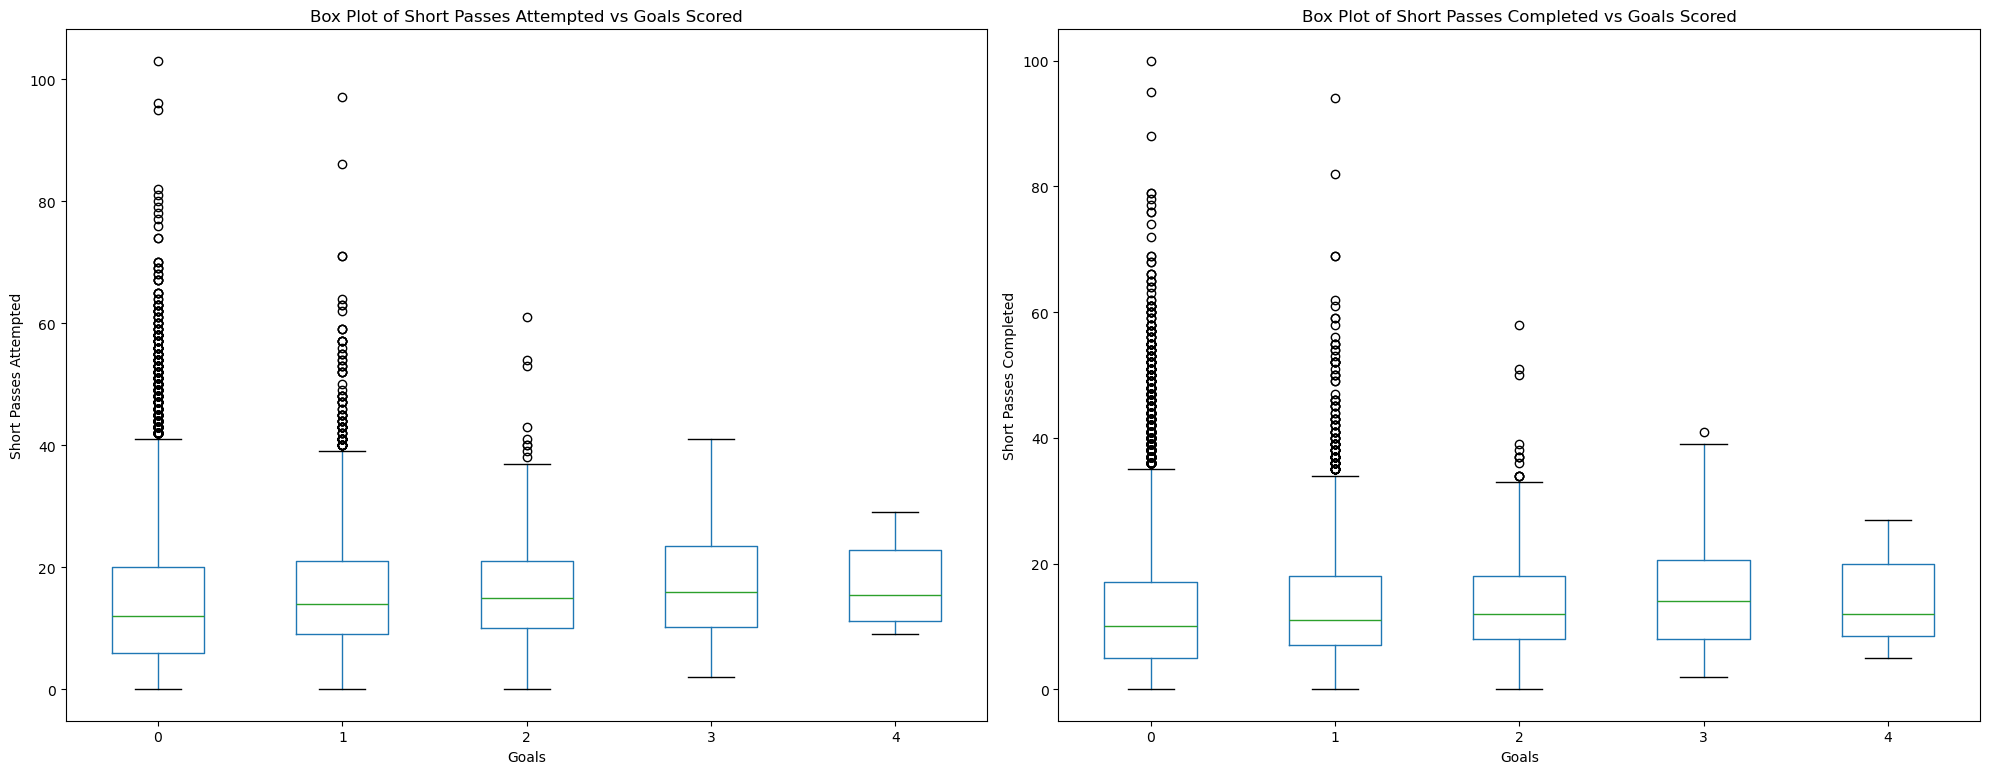

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Short Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Short Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Short Passes Attempted')

att_explore.boxplot(column = 'Short Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Short Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Short Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

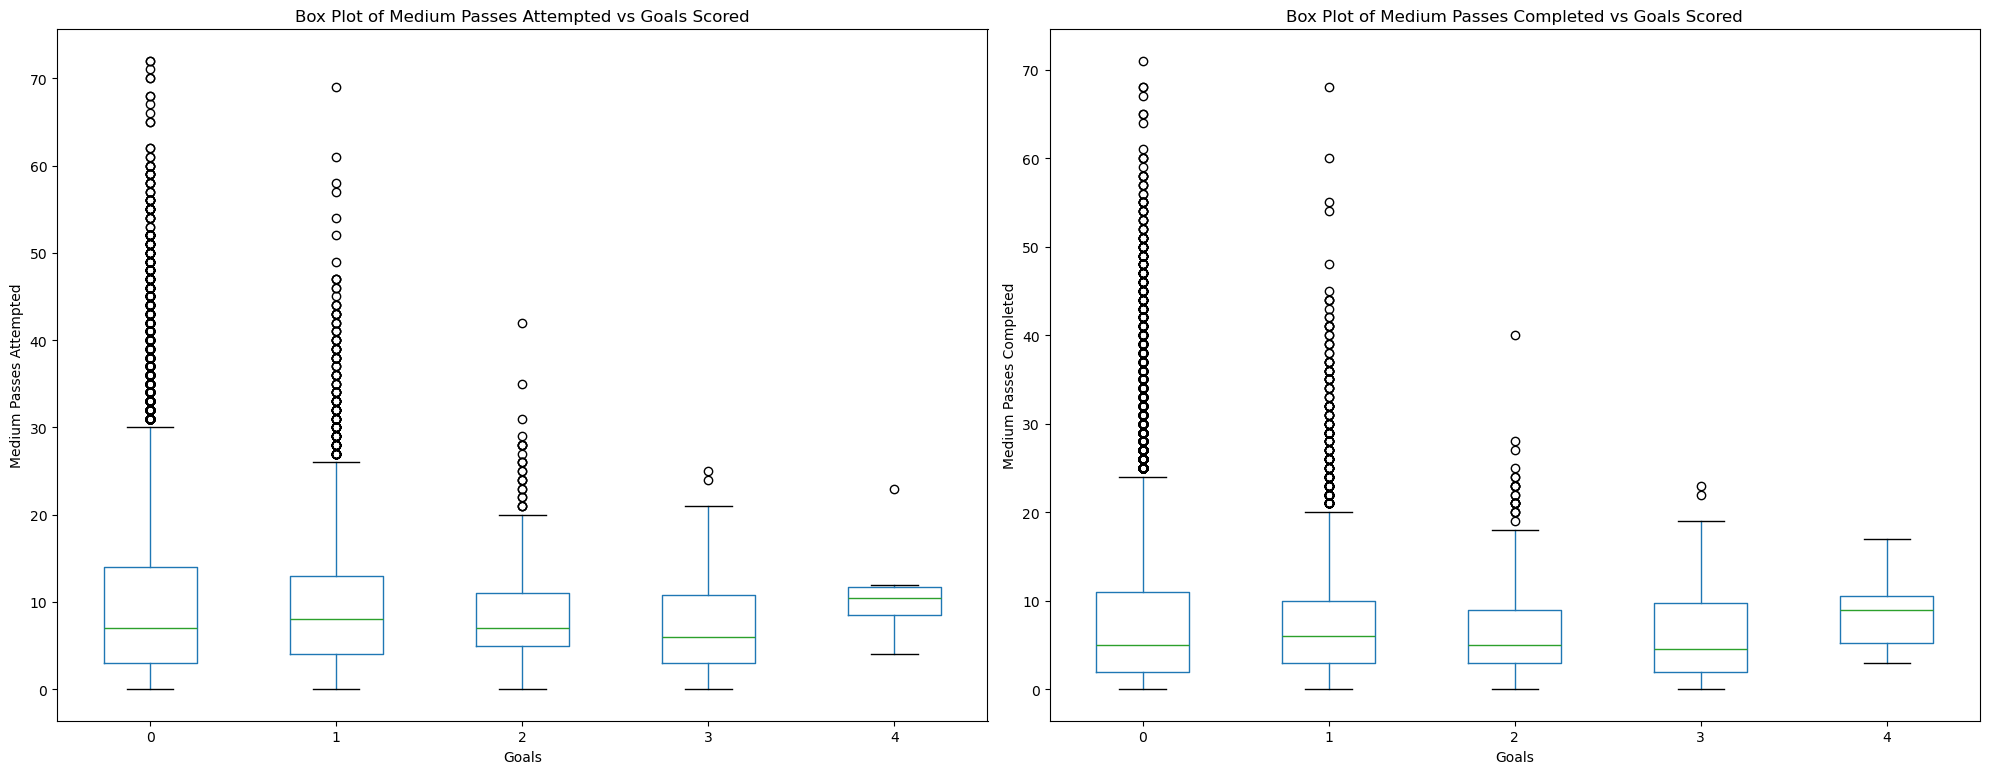

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Medium Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Medium Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Medium Passes Attempted')

att_explore.boxplot(column = 'Medium Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Medium Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Medium Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

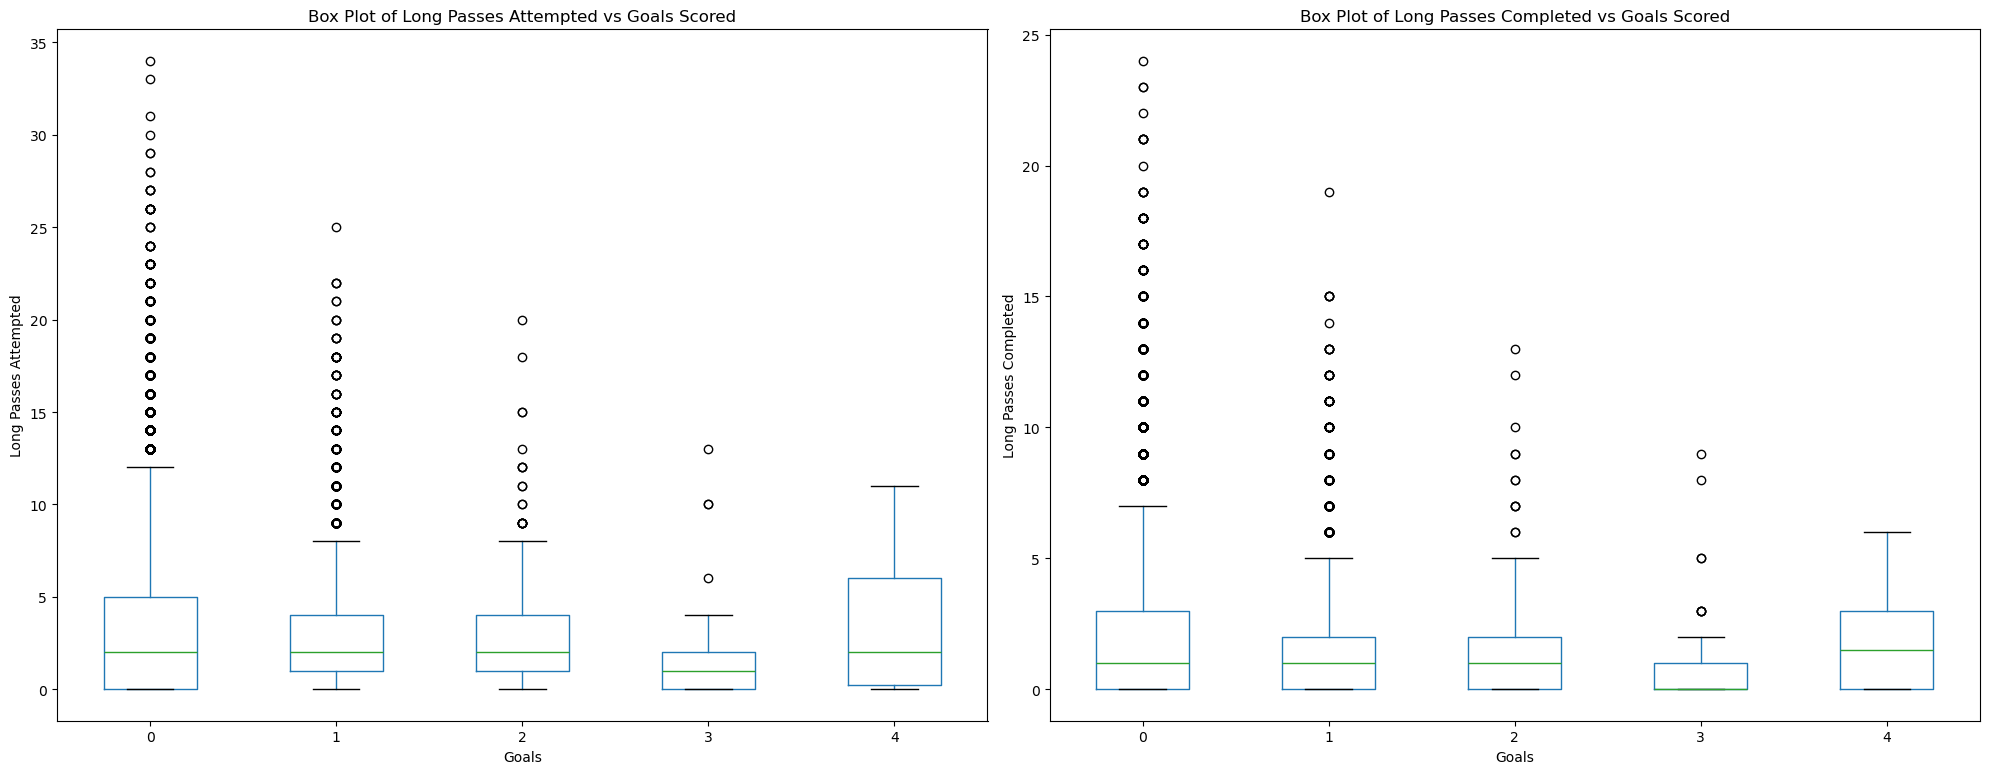

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Long Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Long Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Long Passes Attempted')

att_explore.boxplot(column = 'Long Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Long Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Long Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

The boxplots exhibit a relationship that we expected. There doesn't appear to be a relationship between the number of passes attempted/completed of different lengths (short/medium/long) and the number of goals scored. 

#### Passes into Final Third/Penalty Area

We now turn to look at the relationship between goals scored and passes into the final third/penalty area. We expect these features to have a stronger relationship with Assists, and not necessarily to have a strong relationship with Goals. This is because high number of passes into the final third/penalty area are reflective of a creative player who is consistently playing passes into dangerous attacking areas, which means they should generally be more likely to get more assists. 

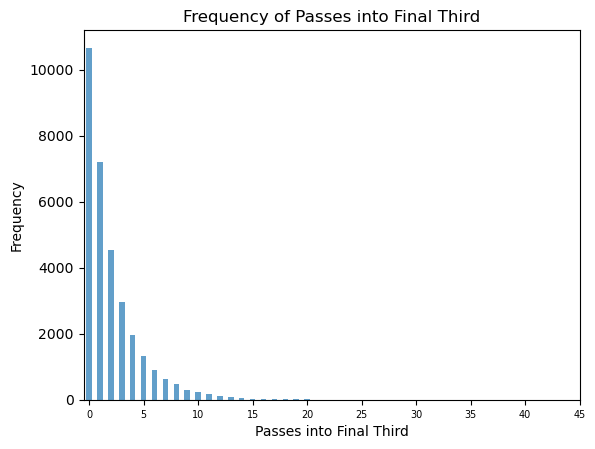

In [23]:
passfinalthird_count = att_explore['Passes into Final Third'].value_counts().sort_index()

fig, ax = plt.subplots()

passfinalthird_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Passes into Final Third')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Passes into Final Third')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 50, 5))
ax.set_xticklabels(range(0, 50, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

As with the frequency of all passing data so far, we see that the frequency is left-skewed. 

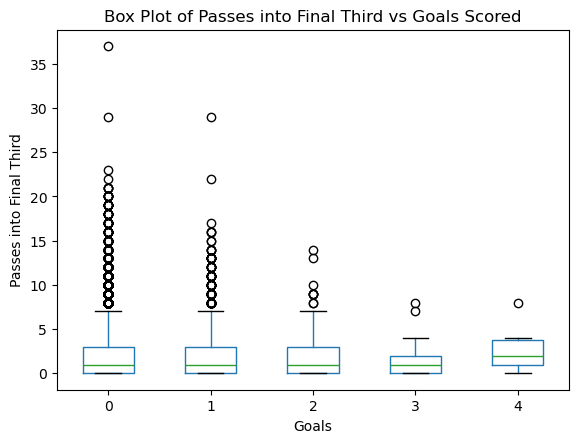

In [24]:
plt.figure
att_explore.boxplot(column = 'Passes into Final Third', by = 'Goals', grid = False)
plt.title('Box Plot of Passes into Final Third vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes into Final Third')
plt.show()

Again, the median value for passes into final third is pretty much the same across different amounts of goals scored. Let's have a look at the relationship between this feature and assists. 

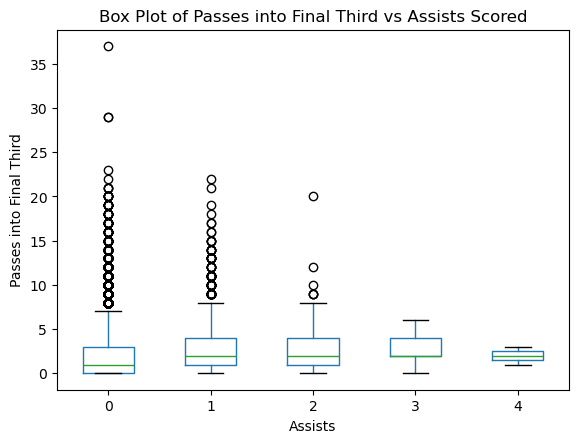

In [25]:
plt.figure
att_explore.boxplot(column = 'Passes into Final Third', by = 'Assists', grid = False)
plt.title('Box Plot of Passes into Final Third vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes into Final Third')
plt.show()

It appears as if the median value for passes into the final third is higher for observations that record at least 1 assist, compared to observations that don't record an assist at all. We can reproduce the above plot, but this time grouping together observations that have non-zero values for Assists. 

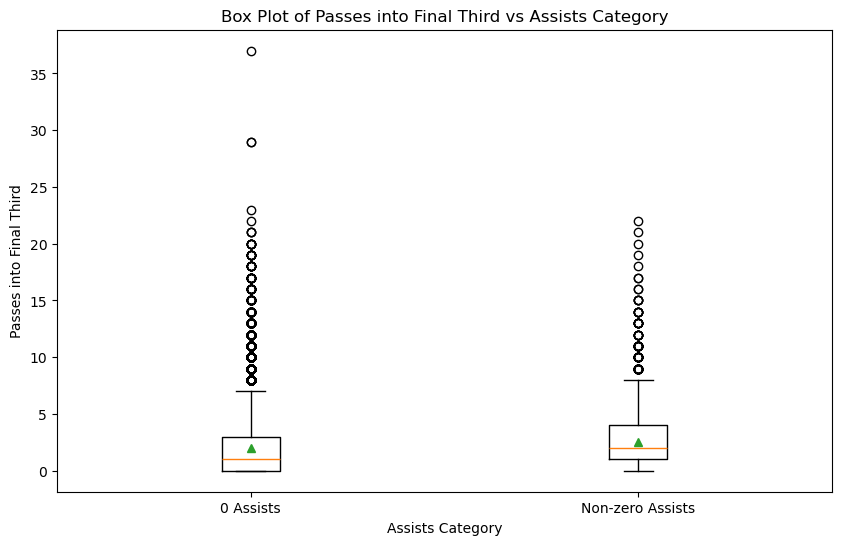

In [26]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Passes into Final Third'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Passes into Final Third']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Final Third vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Final Third')

# Show the plot
plt.show()

So we can definitely see that the median values are slightly different when comparing observations with zero assists with observations with non-zero assists. However, we can also see that the mean passes into final third values are quite similar (the mean values are represented by the green triangles). The reason why the mean values are similar could be explained by the fact that there are quite a few observations that have 0 assists, but have quite large values for passes into the final third. Therefore, using the mean as a measure of central tendancy is perhaps not the best idea. Another thing to note is that the difference in the median values of passes into the final third isn't necessarily that large. The difference we can see could potentially be attributed to normal variation, instead of a more significant underlying relationship. 

One thing that could also be impacting our interpretation is the inclusion of observations with 0 passes into the final third in the plots. We can try exclude these observations and replot to see if we draw any different conclusions. 

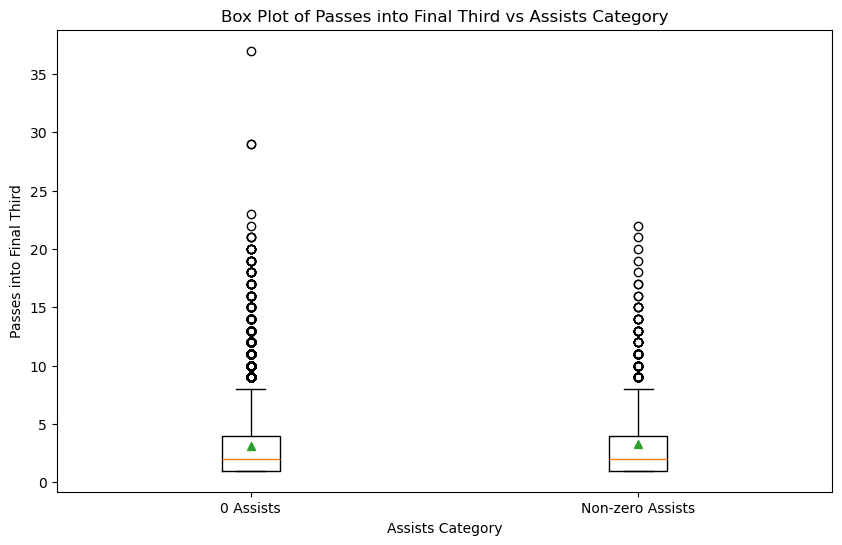

In [27]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Passes into Final Third'] > 0)]['Passes into Final Third'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Passes into Final Third'] > 0)]['Passes into Final Third']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('Box Plot of Passes into Final Third vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Final Third')

plt.show()

What we actually see now is that the mean and median passes into the final third is pretty much the same when comparing observations with 0 assists with observations with non-zero assists. So we have shown that the variation we saw before was actually attributed to the observations that have 0 passes into the final third 'pulling down' the median. 

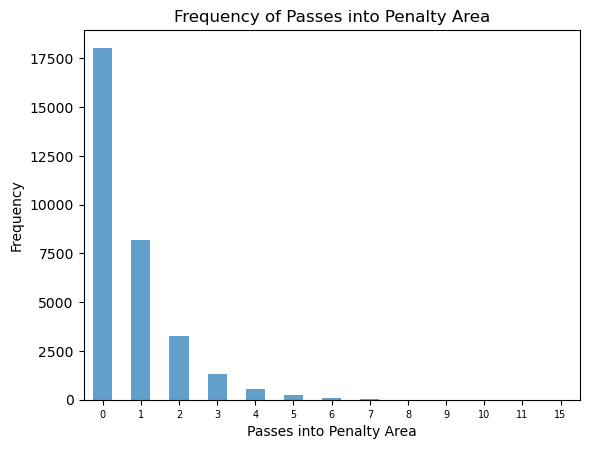

In [28]:
passintopenarea_count = att_explore['Passes into Penalty Area'].value_counts().sort_index()

fig, ax = plt.subplots()

passintopenarea_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Passes into Penalty Area')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Passes into Penalty Area')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

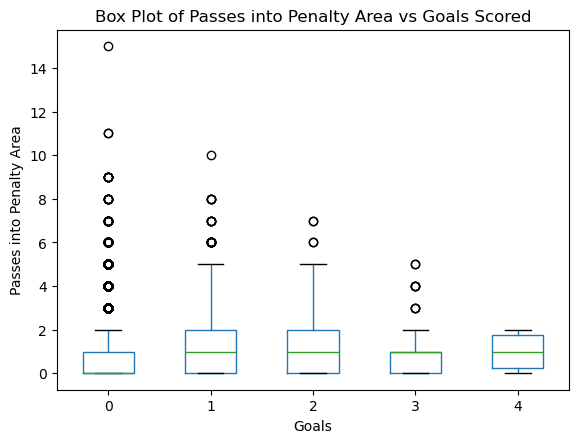

In [29]:
plt.figure
att_explore.boxplot(column = 'Passes into Penalty Area', by = 'Goals', grid = False)
plt.title('Box Plot of Passes into Penalty Area vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes into Penalty Area')
plt.show()

It appears as if the median passes into penalty area is higher for observations that have scored at least 1 goal. Again, we can group the observations by whether or not the number of goals scored is non-zero. 

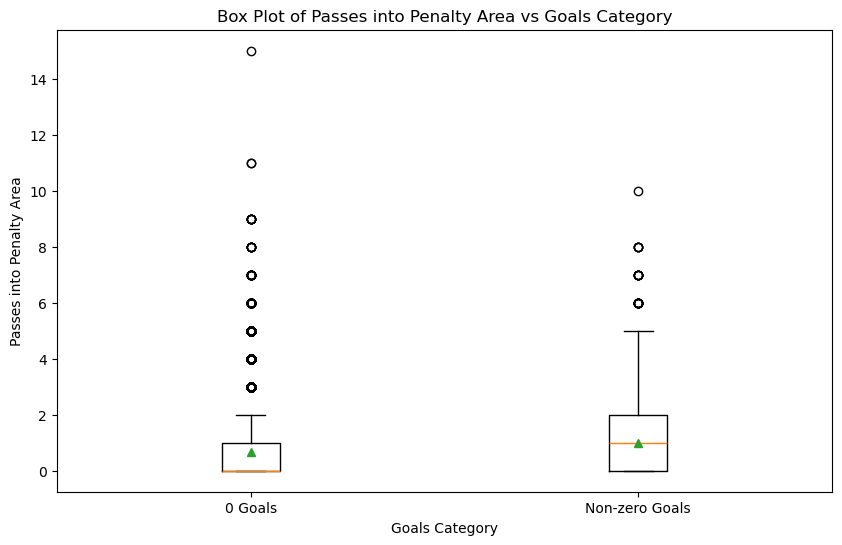

In [30]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[att_explore['Goals'] == 0]['Passes into Penalty Area'],   # Goals == 0
        att_explore[att_explore['Goals'] != 0]['Passes into Penalty Area']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Penalty Area vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Passes into Penalty Area')

# Show the plot
plt.show()

The plot above exhibits a similar sort of behaviour to what was identified before. The median passes into penalty area is noticeably lower for observations that did not score a goal when compared to observations that scored at least 1 goal. However, the mean passes into the penalty area for the two categories is quite similar. In the previous case, we removed the observations that had zero passes into the penalty area, which then allowed us to see that the median and mean values are actually the same for the two categories. 

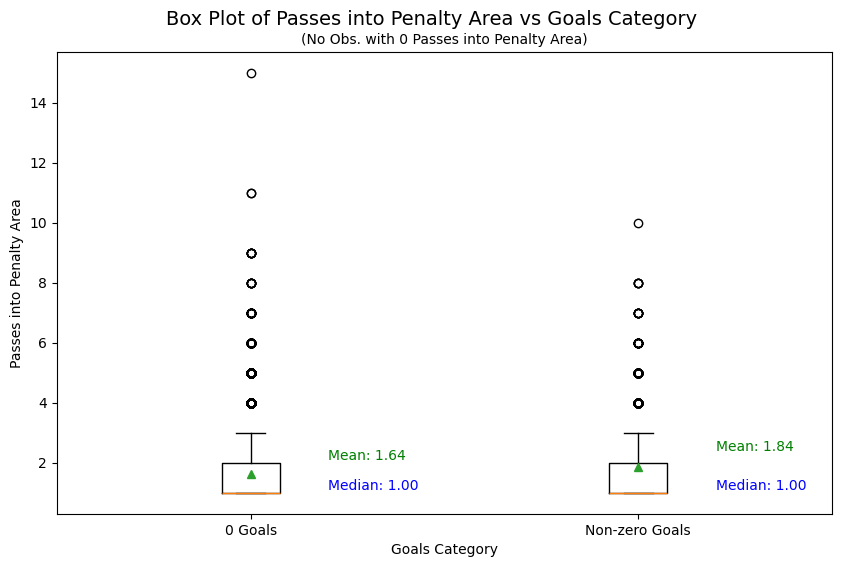

In [31]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Goals'] == 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Goals'] != 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

plt.title('(No Obs. with 0 Passes into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Passes into Penalty Area vs Goals Category', y = 0.95, fontsize = 14)
plt.xlabel('Goals Category')
plt.ylabel('Passes into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

Here, we can see that the median passes into the penalty area is now equal for the two categories, but the means are different. However, the difference is not that significant. Perhaps there is no relationship between passes into the penalty area and goals. Let's now have a look at the relationship between this feature and assists. 

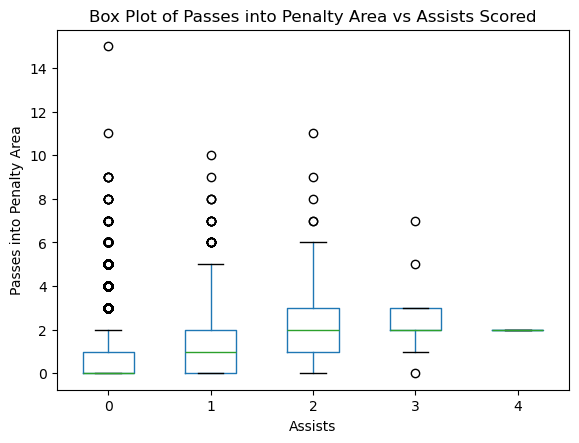

In [32]:
plt.figure
att_explore.boxplot(column = 'Passes into Penalty Area', by = 'Assists', grid = False)
plt.title('Box Plot of Passes into Penalty Area vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes into Penalty Area')
plt.show()

This plot shows that there appears to be some relationship between passes into the penalty area and assists. We can see that the median passes into penalty area is higher for observations with 1 assists compared to 2 assists. The median value is then even higher for observations with 2 assists. The median value is then quite similar for 3 assists and 4 assists, but this is probably due to the fact that observations with 3 or 4 assists in 1 game can probably be considered outliers anyways. 

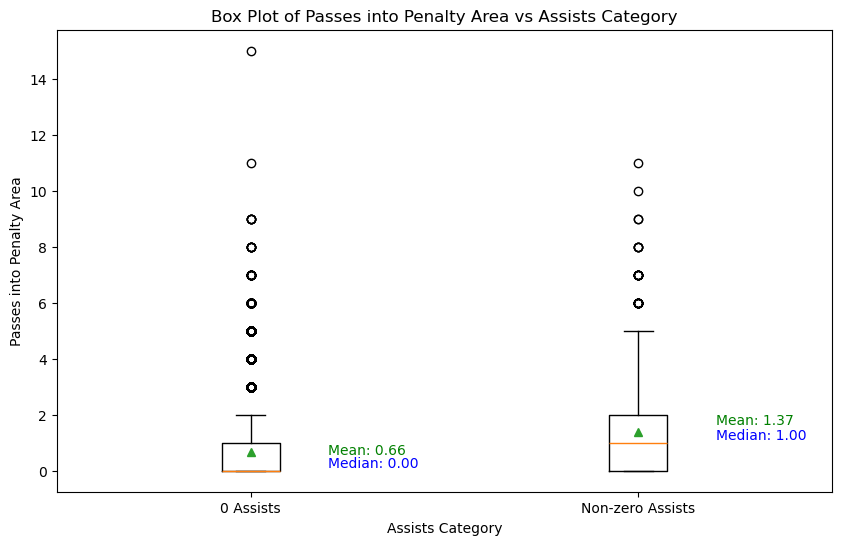

In [33]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Passes into Penalty Area'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Passes into Penalty Area']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Penalty Area vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

The median passes into the penalty area for observations that recorded no assists is actually zero. However, this is probably because there are quite a few observations that have zero assists and zero passes into the penalty area. Let's again remove the observations with zero passes into the penalty area. 

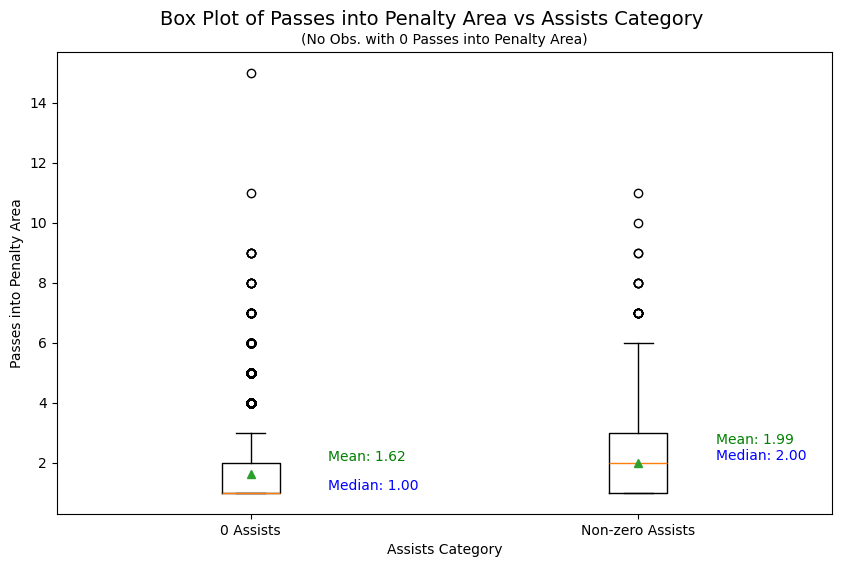

In [34]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Passes into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Passes into Penalty Area vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Passes into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

Even after removing all observations with 0 passes into the penalty area from the plot, we can see that the median and mean values still exhibit some difference when comparing the two categories. As expected, there is probably a relationship between assists and passes into the penalty area. 

#### Crosses into the Penalty Area

Crosses into the Penalty Area is an interesting metric when it comes to our expectations of whether or not it has any relation to either Goals or Assists. First off, we don't really expect this feature to have any significant relation to Goals, using similar lines of reasoning to justify the relationship between Passes into the Penalty Area and Goals. Now we saw in the previous section that there appears to be some relationship between Passes into the Penalty Area and Assists. This may seemingly provide justification for some sort of relationship between Crosses into the Penalty Area and Assists. However, there is relevant literature which suggests that crosses in general are quite a wasteful way of chance creation, i.e. a lot of crosses are required to produce just one high quality chance. Therefore, it may be the case that a high volume of crosses into the penalty area is not particularly suggestive of increased assist threat. 

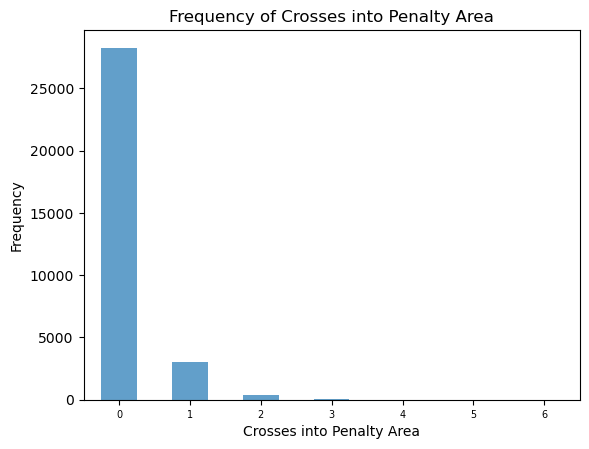

In [35]:
crossintopenarea = att_explore['Crosses into Penalty Area'].value_counts().sort_index()

fig, ax = plt.subplots()

crossintopenarea.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Crosses into Penalty Area')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Crosses into Penalty Area')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Almost all of the observations have recorded 0 crosses into the penalty area. This already suggests that it is unlikely this will be a particularly useful metric.

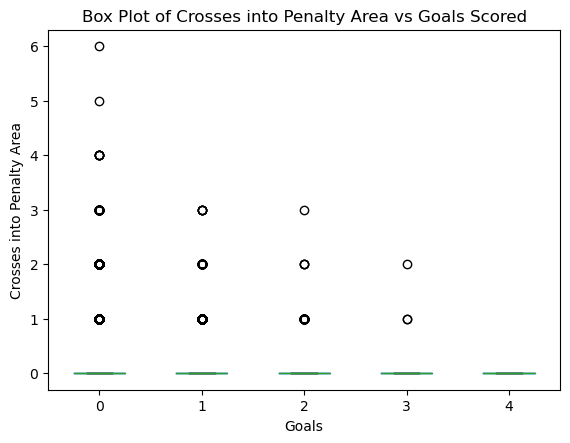

In [36]:
plt.figure
att_explore.boxplot(column = 'Crosses into Penalty Area', by = 'Goals', grid = False)
plt.title('Box Plot of Crosses into Penalty Area vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Crosses into Penalty Area')
plt.show()

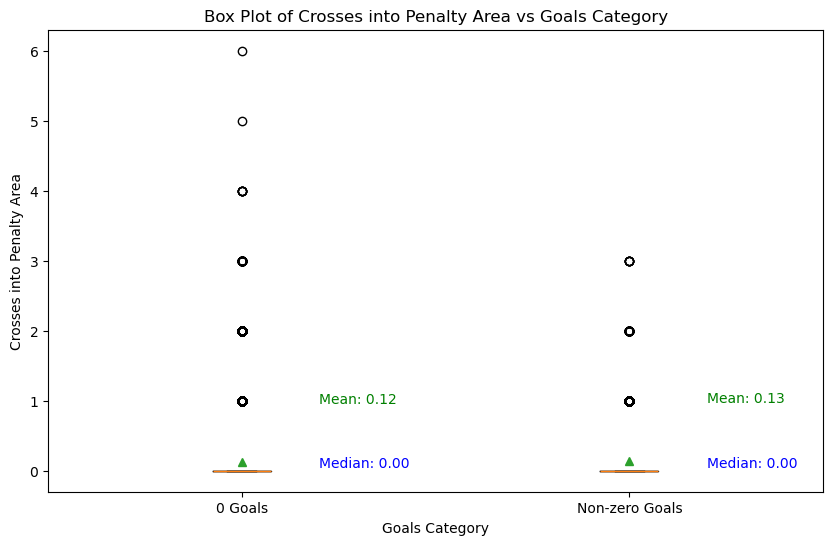

In [37]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[att_explore['Goals'] == 0]['Crosses into Penalty Area'],   # Goals == 0
        att_explore[att_explore['Goals'] != 0]['Crosses into Penalty Area']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses into Penalty Area vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Crosses into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

As expected, there appears to be no relationship between this feature and Goals. 

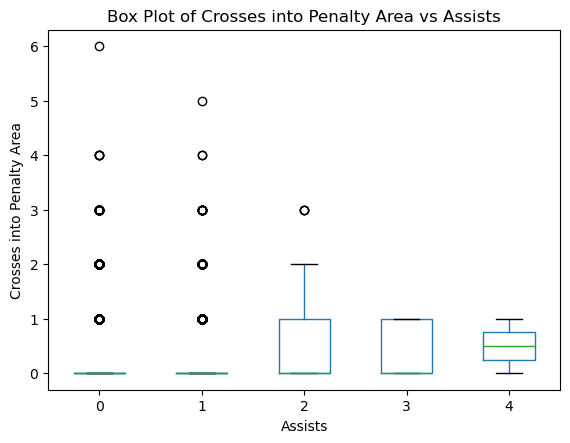

In [38]:
plt.figure
att_explore.boxplot(column = 'Crosses into Penalty Area', by = 'Assists', grid = False)
plt.title('Box Plot of Crosses into Penalty Area vs Assists')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Crosses into Penalty Area')
plt.show()

This box plot is interesting. First off, the distribution of Crosses into the Penalty Area looks to be the same for observations with 0 assists and 1 assist. However, this is probably because majority of the observations have 0 crosses into the penalty area. There also appears to be a bigger spread of non-zero crosses into the penalty area values for observations with 2 or more assists, as shown by the size of the boxes. 

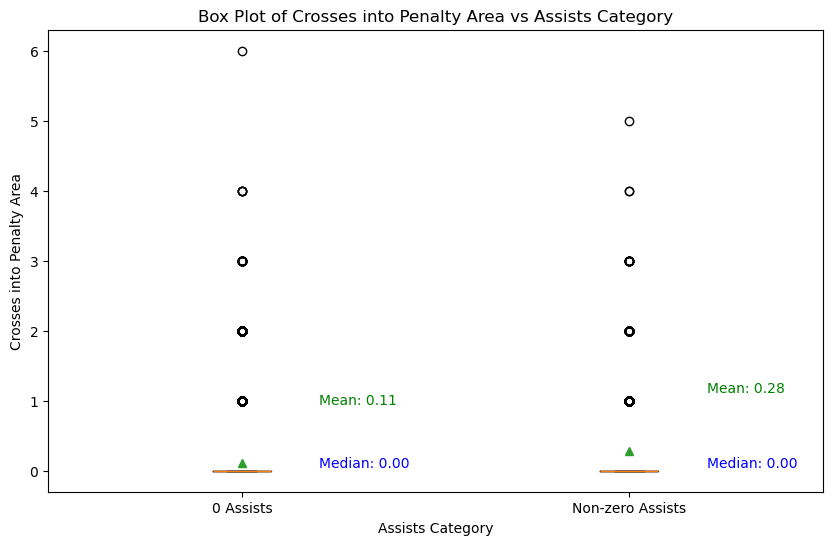

In [39]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Crosses into Penalty Area'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Crosses into Penalty Area']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses into Penalty Area vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Crosses into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

This boxplot initially suggests that there is no relationship between Assists and Crosses into the Penalty Area. Although the median values are the same for the two categories, we can see that the mean value is actually higher for observations that recorded non-zero assists. The median values being the same is most likely due to the number of observations that have 0 crosses into the penalty area. Let's remove these observations. 

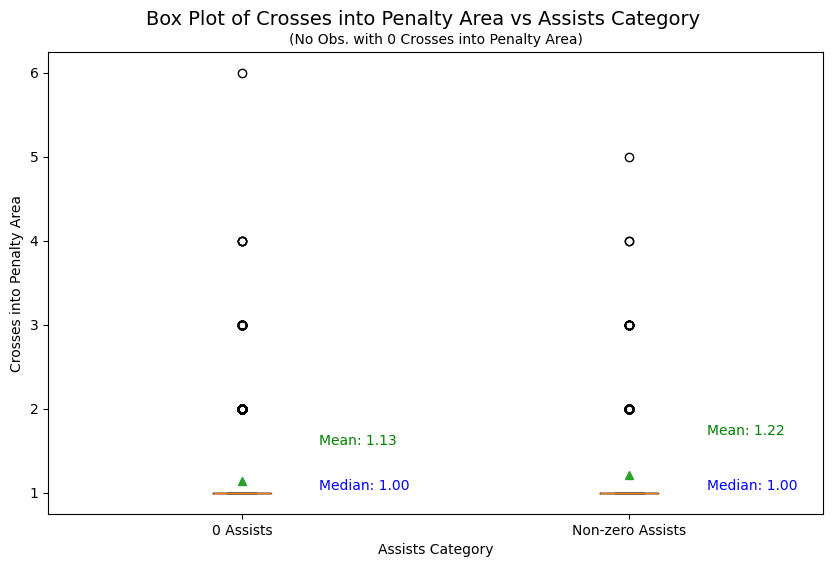

In [40]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Crosses into Penalty Area'] > 0)]['Crosses into Penalty Area'],   # Assists == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Crosses into Penalty Area'] > 0)]['Crosses into Penalty Area']    # Assists != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Crosses into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Crosses into Penalty Area vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Crosses into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

When removing all observations with 0 crosses into the penalty area, we actually see that the median values are still the same for the two categories. Although the mean value is slightly higher for observations that have recorded at least 1 assist, the difference in means is not particularly significant. Therefore, we can probably conclude that there is no relationship between this feature and either Goals or Assists. 

#### Key Passes

Key Passes are an important metric that measures the number of passes a player makes to a player which leads to a shot. In other words, a key pass is recorded if a player makes a pass to a player, who then takes a shot. We expect this to be a metric/feature that gives us more information about the creativity of a player, rather than their goalscoring potential. In other words, the expectation is that Key Passes may provide good information about Assists, but not necessarily about Goals. 

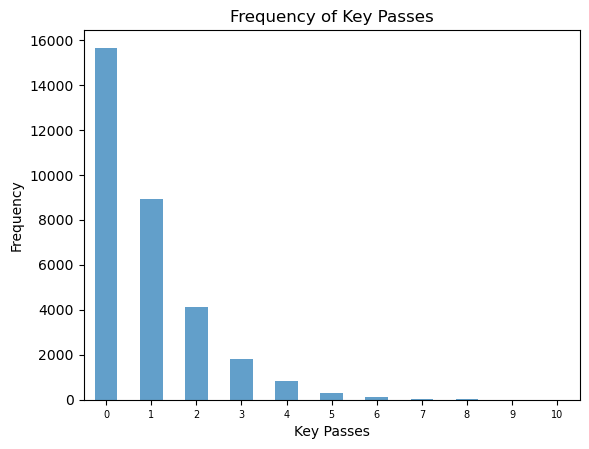

In [41]:
keypass_count = att_explore['Key Passes'].value_counts().sort_index()

fig, ax = plt.subplots()

keypass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Key Passes')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Key Passes')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, we see that over half of the observations record 0 key passes. There is a greater spread of different key pass values than some of the other features however. 

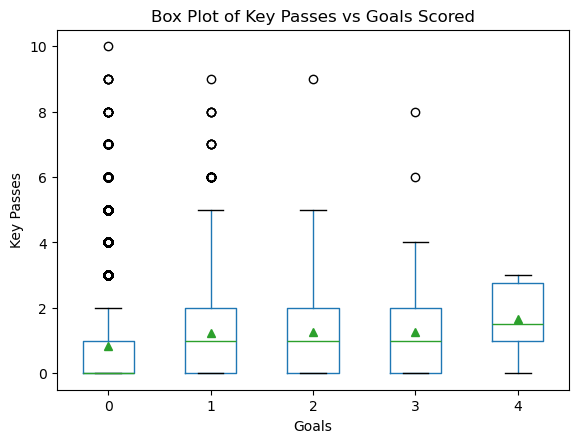

In [42]:
plt.figure
att_explore.boxplot(column = 'Key Passes', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Key Passes')
plt.show()

This plot appears to show that the median value for key passes is higher for observations that record at least 1 goal. Let's see if this is the case if we remove the observations that recorded 0 key passes. 

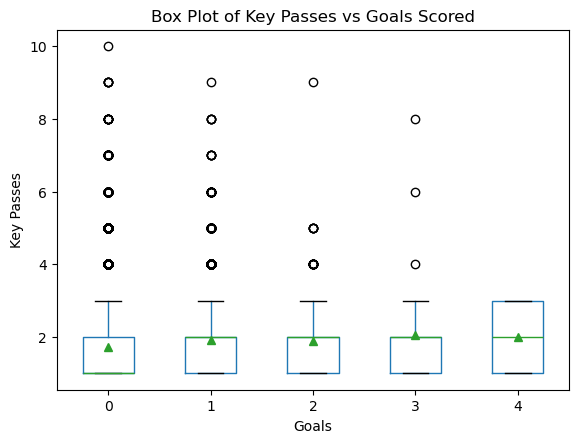

In [43]:
nonzero_keypass_dat = att_explore[att_explore['Key Passes'] > 0 ]

plt.figure
nonzero_keypass_dat.boxplot(column = 'Key Passes', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Key Passes')
plt.show()

We can see that the median key pass value is still noticeably different for observations that record at least 1 goal, in comparison to the median key pass value for observations with no goals. However, the mean values for key pass appears to be quite similar. We can group the observations that record at least 1 goal together. However, based on this plot, we expect to see a similar picture. 

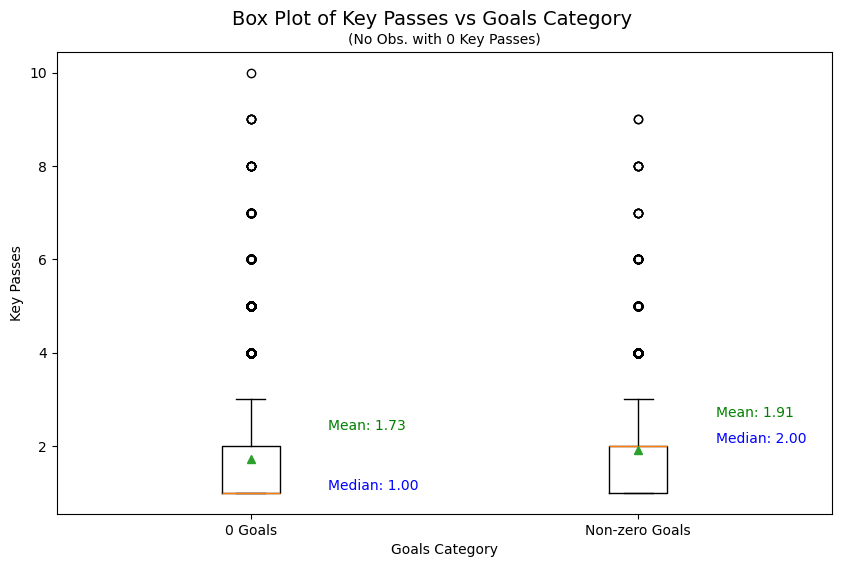

In [44]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Goals'] == 0) & (att_explore['Key Passes'] > 0)]['Key Passes'],   # Goals == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Goals'] != 0) & (att_explore['Key Passes'] > 0)]['Key Passes']    # Goals != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

plt.title('(No Obs. with 0 Key Passes)', fontsize = 10)
plt.suptitle('Box Plot of Key Passes vs Goals Category', y = 0.95, fontsize = 14)
plt.xlabel('Goals Category')
plt.ylabel('Key Passes')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

As expected, we can see that the mean values are quite similar to each other when comparing the two categories. 

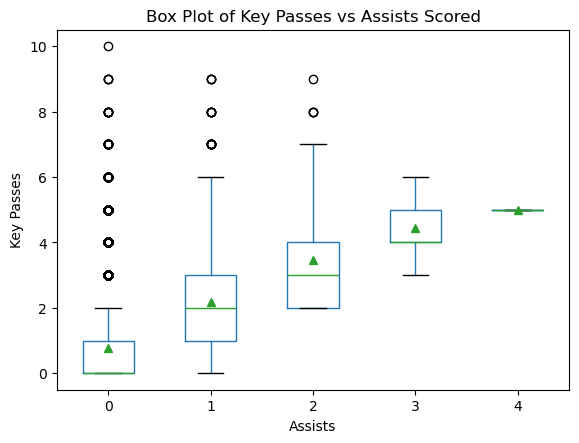

In [45]:
plt.figure
att_explore.boxplot(column = 'Key Passes', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Key Passes')
plt.show()

As expected, there appears to be quite a significant relationship between Key Passes and Assists. We can see that both the median and mean key passes increase step by step as the number of assists recorded increases. Let's see if this holds if we remove all observations with zero key passes. 

In [46]:
att_explore[(att_explore['Assists'] != 0) & (att_explore['Key Passes'] == 0)].index

Index([15856, 30381], dtype='int64')

There are two observations that have non-zero values for assists, but 0 key passes. I'm not too sure why this is the case. 

In [47]:
att_explore.loc[att_explore[(att_explore['Assists'] != 0) & (att_explore['Key Passes'] == 0)].index][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played', 'Assists', 'Key Passes']]

,Venue,Result,Team,Opponent,Position,Minutes Played,Assists,Key Passes
15856,Home,W 2–0,Manchester City,Aston Villa,CM,90,1,0
30381,Away,W 1–0,Brighton,Newcastle Utd,LM,79,1,0


When looking at the first observation (index 17685), and comparing the data from this game with data from other sources, there appears to be a mistake. In this dataset, none of the players playing in this game for Manchester City recorded a key pass. However, this is most definitely not the case when looking at alternative data sources, as well as when looking over game highlights. Therefore, we may want to remove these observations from the dataset. 

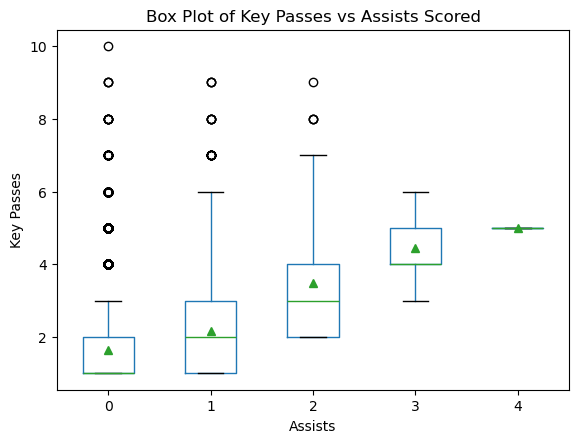

In [48]:
plt.figure
nonzero_keypass_dat.boxplot(column = 'Key Passes', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Key Passes')
plt.show()

After removing the observations that have recorded 0 key passes, we can see that the relationship still holds. The median/mean key pass values are still steadily increasing as the number of assists increase. This makes a lot of sense, because in general a key pass is a necessary component of any assist (if you are not making the pass to a player who takes a shot, how are you recording an assist?). Therefore, you would expect more key passes to equal more opportunities to record an assist (not accounting for the quality of the key pass, as not all key passes have equal quality), which is why we see this positive relationship between assists and key passes. 

#### Live/Dead Passes

Live and Dead Passes are essentially just a more filtered version of Passes Attempted. A Live Pass is just an attempted pass that occurs during live play, whilst a Deadball Pass is a pass that occurs from either a Throw-in, Free kick, Corner or Goal kick. Let's make sure that this is consistent throughout the dataset by comparing the sum of Live and Dead Passes with Passes Attempted.

In [49]:
att_explore[att_explore['Live Pass'] + att_explore['Dead Pass'] != att_explore['Passes Attempted']]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.200000,5,87.500000
8,21739,301,Sat,5,Home,W 1–0,Fulham,Luton Town,Y,RM,...,0,0,0,0,1,0,NaN,NaN,1,92.000000
10,6717,105,Mon,31,Away,L 0–3,Arsenal,Crystal Palace,Y,"CM,AM",...,0,0,0,1,0,0,NaN,0.000000,0,80.000000
13,14189,195,Sun,17,Home,L 1–2,Brighton,Chelsea,Y,FW,...,0,0,0,0,0,0,NaN,NaN,1,78.947368
15,35001,463,Sun,21,Away,D 2–2,Liverpool,Chelsea,Y,CM,...,0,0,0,1,0,0,NaN,NaN,2,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31716,5388,86,Sun,1,Home,L 0–3,West Brom,Leicester City,Y,"RM,FW",...,0,0,0,0,1,0,NaN,0.333333,0,72.222222
31721,3794,58,Sat,7,Home,D 2–2,West Brom,Watford,Y,"AM,RW",...,1,0,0,0,0,1,NaN,0.000000,2,70.000000
31722,39258,521,Sat,3,Home,D 2–2,Bournemouth,Everton,Y,RM,...,0,0,0,0,1,0,NaN,0.000000,2,63.636364
31724,32230,431,Sat,35,Away,W 3–0,Brighton,Wolves,Y,AM,...,0,0,0,0,0,0,0.5,0.000000,3,81.081081


We can see that there are actually 3595 observations where the number of passes attempted is not equal to the sum of live and dead passes. 

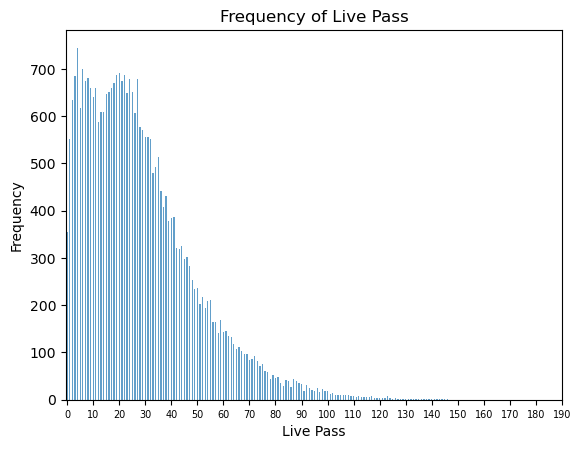

In [50]:
livepass_count = att_explore['Live Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

livepass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Live Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Live Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 200, 10))
ax.set_xticklabels(range(0, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

The frequency of 'Live Pass' values looks quite similar to the frequency of Passes Attempted. Let's plot them against each other and look at their correlation. 

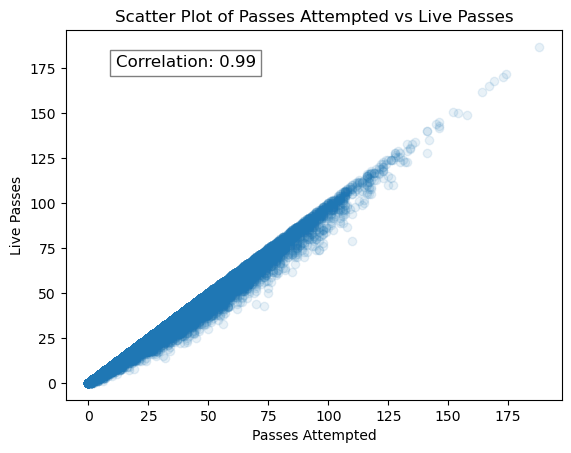

In [51]:
#calculate the correlation
correlation = att_explore['Passes Attempted'].corr(att_explore['Live Pass'])

plt.figure()
plt.scatter(att_explore['Passes Attempted'], att_explore['Live Pass'], alpha=0.1)
plt.title(f'Scatter Plot of Passes Attempted vs Live Passes')
plt.xlabel('Passes Attempted')
plt.ylabel('Live Passes')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

We can see that the 'Live Pass' feature is highly correlated with the 'Passes Attempted' feature. This tells us that majority of the passes attempted are recorded as live passes (this makes sense given our understanding of what live passes are). Based on this, we can probably remove Live Pass as a feature, since it provides us pretty much the exact same information that is captured in the 'Passes Attempted' feature. 

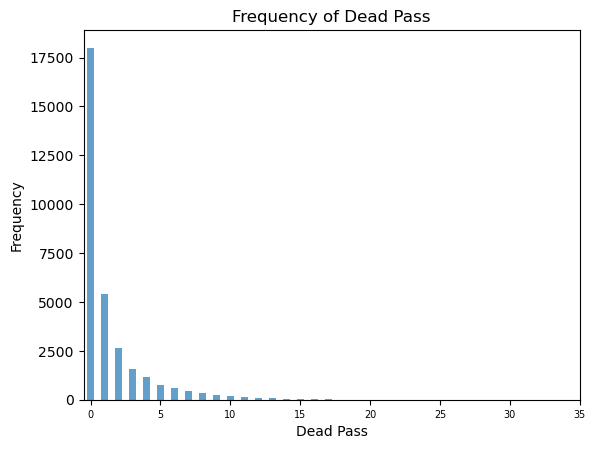

In [52]:
deadpass_count = att_explore['Dead Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

deadpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Dead Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Dead Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

It makes sense that majority of the observations have recorded 0 Dead Passes. Only a select few of the players are designated corner/freekick/throw-in takers. 

Based on this, let's compare the 'Dead Pass' values with the sum of 'Free Kick Pass', 'Corners Taken' and 'Throw Ins Taken' 

In [53]:
att_explore[att_explore['Free Kick Pass'] + att_explore['Corners Taken'] + att_explore['Throw Ins Taken'] != att_explore['Dead Pass']]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage


There are still quite a few observations that have recorded dead pass values that are different to the sum of free kicks taken, corners taken and throw-ins taken. I am unsure why this is the case. 

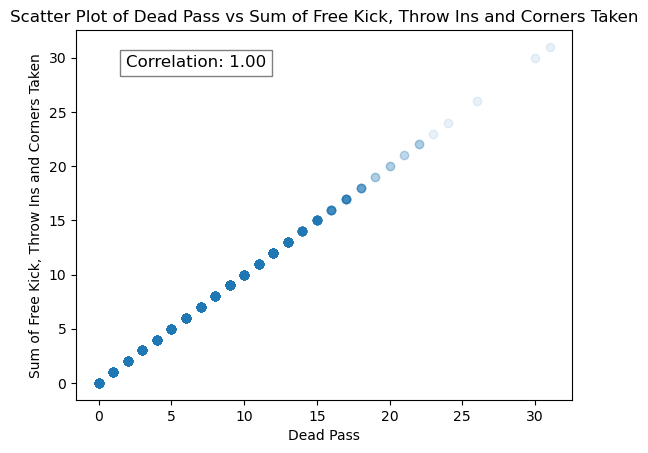

In [54]:
#make new variable called deadballsum 
deadpass_sum = att_explore['Free Kick Pass'] + att_explore['Throw Ins Taken'] + att_explore['Corners Taken']

#calculate the correlation
correlation = att_explore['Dead Pass'].corr(deadpass_sum)

plt.figure()
plt.scatter(att_explore['Dead Pass'], deadpass_sum, alpha=0.1)
plt.title(f'Scatter Plot of Dead Pass vs Sum of Free Kick, Throw Ins and Corners Taken')
plt.xlabel('Dead Pass')
plt.ylabel('Sum of Free Kick, Throw Ins and Corners Taken')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

The scatter plot shows us that majority of the observation have equal values for 'Dead Pass' and sum of Free Kicks/Corners and Throw-ins taken. This is shown by the correlation between these two variables. However, there appear to be some pretty significant outliers. For example, we can see that there is at least 1 observation which recorded 10 dead passes, but zero free kicks/corners/throw-ins taken. Let's have a look at this outlier to see if we can isolate the reason why there are observations where these two variables differ. 

In [55]:
att_explore[(att_explore['Dead Pass'] == 10) & (deadpass_sum == 0)][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played']]

,Venue,Result,Team,Opponent,Position,Minutes Played


The observation above belongs to Kieffer Moore in a game that he played for Bournemouth against Liverpool. The 10 dead passes recorded by Moore are all passes to restart the game (i.e. passes from the center circle). The reason why he recorded 10 dead passes but zero free kicks/corners/throw-ins taken was because Bournemouth conceded 9 times in that game. This meant that Bournemouth restarted the game from the center circle 9 times. The final dead pass is probably when Bournemouth restarted the game in either the first or second half. Therefore, we expect the 5000+ observations above to have unequal dead passes and free kicks/corners/throw ins taken to be attributed to these players being responsible for restarting the game with a pass from the centre circle. 

Although it may make sense to simply add the number of goals conceded to the sum, this ignores the possibility of different players restarting the game. For example, suppose Team A concedes 3 goals in one game. This means that there are 4 dead ball passes that aren't free kicks/corners/throw ins. However, these 4 dead ball passes can be split amongst the team. Therefore, there isn't any good way to better capture this. As the player who accumulates a dead pass by virtue of being responsible for starting the game is essentially an arbitrary decision (based on our understanding of tactical information, the player responsible for kickoff does not make them more likely to score or assist), we can conclude that these dead passes can be removed without necessarily affecting the information provided by the number of dead passes recorded by a player. This can be done by just replacing the values in the 'Dead Pass' column with the values in the variable deadpass_sum. 

In [56]:
att_explore['Dead Pass'] = deadpass_sum

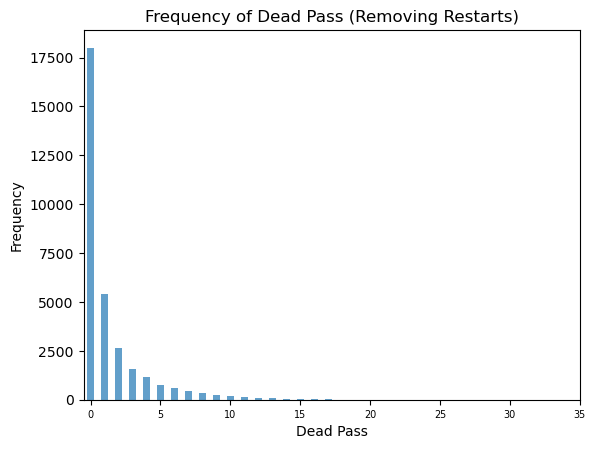

In [57]:
deadpass_count = att_explore['Dead Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

deadpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Dead Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Dead Pass (Removing Restarts)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

In this new frequency plot (after removing dead passes from game restarts), we can see that there are now more observations with 0 dead passes. 

Let's first look at the relatioship between Throw-ins taken and Goals/Assists. Based on my understanding, there should be absolutely no relationship between this feature and Goals/Assists. The reason why I want to analyse this feature first (instead of corners or free kicks taken), is that I want to confirm my hypothesis. If it is true that there is no relation between Throw-ins taken and Goals/Assists, then we can simultaneously remove the 'Throw Ins Taken' feature, whilst also subtracting this value from 'Dead Pass', as we can conclude that throw-ins taken is just a noise variable. 

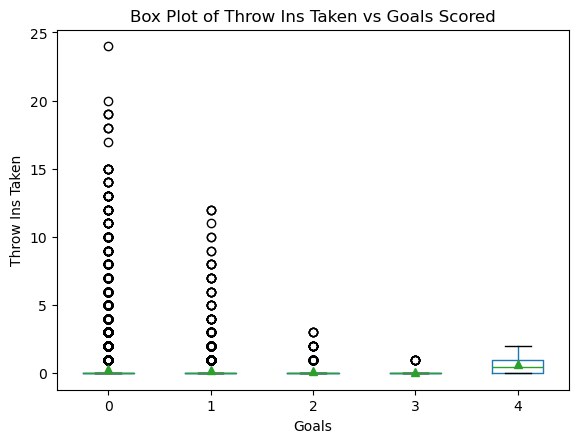

In [58]:
plt.figure
att_explore.boxplot(column = 'Throw Ins Taken', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Throw Ins Taken vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Throw Ins Taken')
plt.show()

We can clearly see that there is no relationship between Throw Ins Taken and Goals

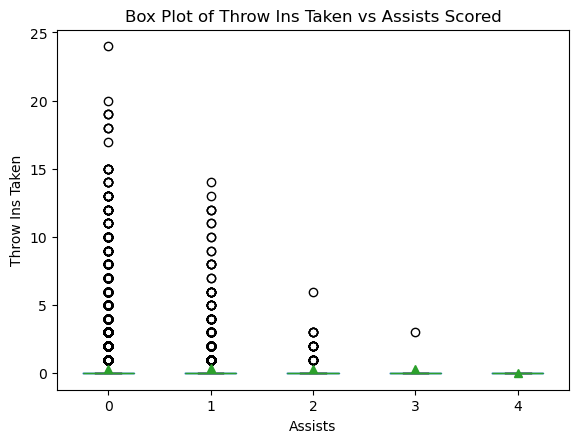

In [59]:
plt.figure
att_explore.boxplot(column = 'Throw Ins Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Throw Ins Taken vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Throw Ins Taken')
plt.show()

Likewise, there appears to be no relationship between throw ins taken and assists. Therefore, we can discard this feature. 

We now have a look at the relationship between free kicks taken and goals/assists

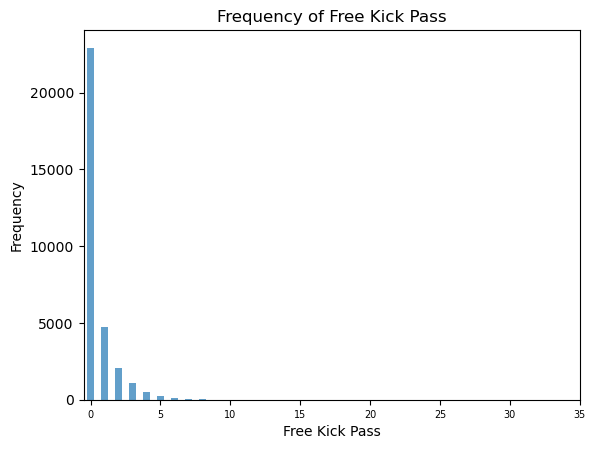

In [60]:
freekickpass_count = att_explore['Free Kick Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

freekickpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Free Kick Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Free Kick Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

The frequency plot shows that a vast majority of the observations recorded no free kicks taken. 

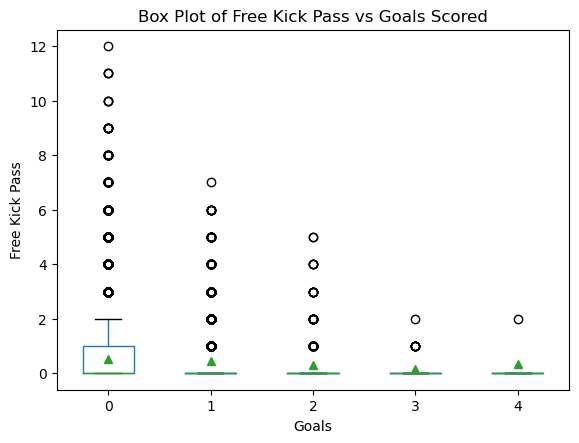

In [61]:
plt.figure
att_explore.boxplot(column = 'Free Kick Pass', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Free Kick Pass')
plt.show()

The initial view is that there doesn't appear to be any relationship between the number of free kicks taken and the number of goals scored. The mean number of free kicks taken actually seems to be higher for observations that recorded 0 goals. 

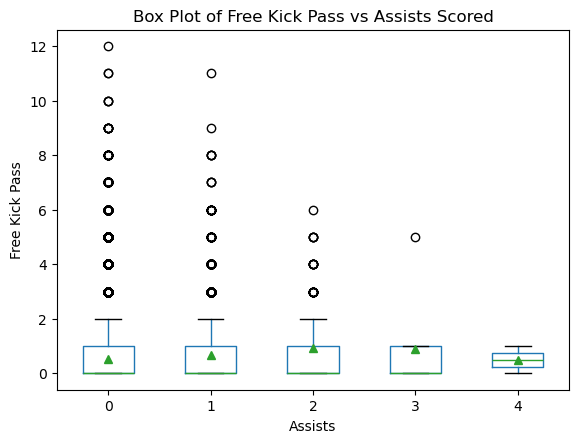

In [62]:
plt.figure
att_explore.boxplot(column = 'Free Kick Pass', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Free Kick Pass')
plt.show()

This box plot also doesn't really suggest any relationship between the number of free kicks taken and the number of assists recorded. There does appear to be a slightly higher mean number of free kicks taken for non-zero assists recorded, but the difference doesn't look to be that significant. We can try remove observations that recorded no free kicks taken and replot to see if the trend still holds. It makes sense to do this due to the large number of observations that have recorded zero free kicks taken. 

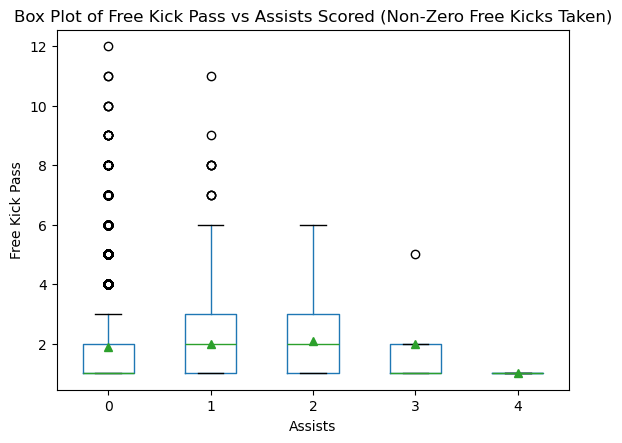

In [63]:
nonzerofk_dat = att_explore[att_explore['Free Kick Pass'] > 0]

plt.figure
nonzerofk_dat.boxplot(column = 'Free Kick Pass', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Assists Scored (Non-Zero Free Kicks Taken)')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Free Kick Pass')
plt.show()

When excluding observations that recorded zero free kicks taken, we can see that the median number of free kicks taken seems to be higher for observations that recorded at least 1 assist. However, the mean values are still pretty much the same. The fact that the mean values are the same may be attributed to the number of observations that have recorded large numbers for free kicks taken, but still recorded 0 assists. 

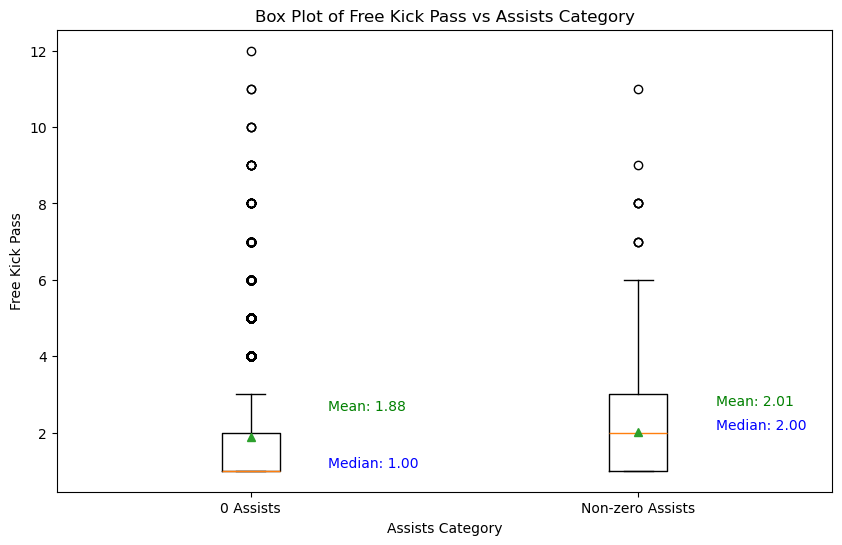

In [64]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [nonzerofk_dat[nonzerofk_dat['Assists'] == 0]['Free Kick Pass'],   # Assists == 0
        nonzerofk_dat[nonzerofk_dat['Assists'] != 0]['Free Kick Pass']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Free Kick Pass vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Free Kick Pass')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations with non-zero assists together, we can see that the median number of free kicks taken is greater by 1. However, the mean number of free kicks taken when comparing the two categories are still quite similar. 

There is a line of thinking that suggests that being a designated free kick taker makes it more likely that you will record assists, since you have an additional avenue to assists that other players don't have. The competing hypothesis is that free kicks are generally low quality opportunies, so even having this additional path to assists doesn't necessarily mean much, since you are increasing your assist potential very slightly. We can investigate this by first identifying Player ID's that the data show are 'designated free kick takers'. We can then compare the assists recorded by players who are designated free kick takers and compare this to the players who aren't designated free kick takers. 

In [65]:
#we first look at how many player_id values record a non-zero value for free kicks taken in any of the observations associated with that 
#player id 

nonzero_fkpass_playerid = att_explore[att_explore['Free Kick Pass'] > 0]['Player ID'].unique()

#let's now have a look at how many free kicks in total were taken for each player id
# Group by 'Player ID' and sum the 'Free Kick Pass' values
total_fkpass = att_explore.groupby('Player ID')['Free Kick Pass'].sum().reset_index()
total_fkpass.columns = ['Player ID', 'Total Free Kicks Taken']

#drop the rows that have total free kicks taken equal to zero
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 0]

#check that the player id's in the total_fkpass dataframe is equal to the player id's in nonzero_fkpass_playerid
total_fkpass['Player ID'].isin(nonzero_fkpass_playerid).sum() == len(nonzero_fkpass_playerid)

True

The above code confirms that the player id's in the total_fkpass dataframe is equal to the player id's in the nonzero_fkpass_playerid list. 

Let's now plot the total number of free kicks taken by player id

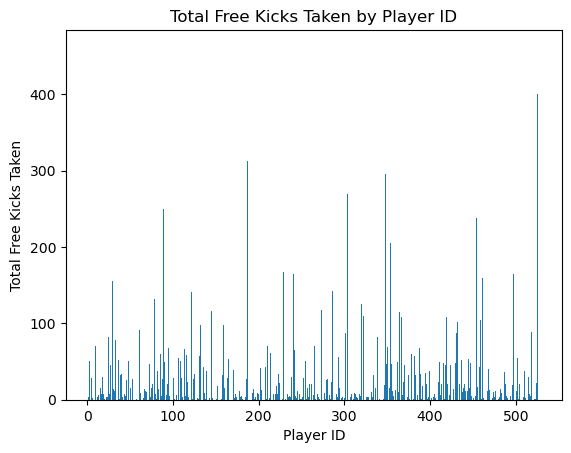

In [66]:
plt.figure()
plt.bar(total_fkpass['Player ID'], total_fkpass['Total Free Kicks Taken'])
plt.title('Total Free Kicks Taken by Player ID')
plt.xlabel('Player ID')
plt.ylabel('Total Free Kicks Taken')
plt.show()

We can see that there are some players that took quite a large number of free kicks across their recorded observations. There are also a lot of players that recorded quite small numbers for total free kicks taken. It is entirely possible that there are certain players who only occasionally took free kicks, whether this is because the main free kick taker was not on the pitch, or perhaps they took the free kick by circumstance. Although we don't have the contextual information to accurately filter out the player id's who aren't actually designated free kick takers, we can instead do the filtering by removing player id's that have taken less than a certain number of free kicks across their career.  

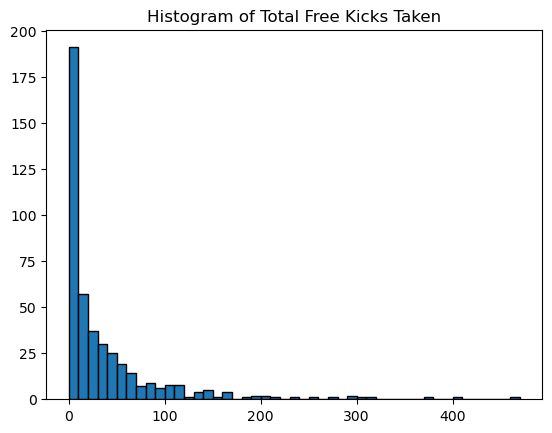

In [67]:
#it is difficult to choose an arbitrary number for free kicks taken to do the filtering without first looking at the distribution of free kicks
#taken, so this is what we'll do first. 

plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken')
plt.xlabel('')
plt.ylabel('')
plt.show()


The histogram shows that an overwhelming majority of the observations have recorded less than 10 total free kicks taken in their career. We can pretty confidently say that the corresponding player id's shouldn't be considered in the list of designated free kick takers. We will remove these observations from the dataframe. 

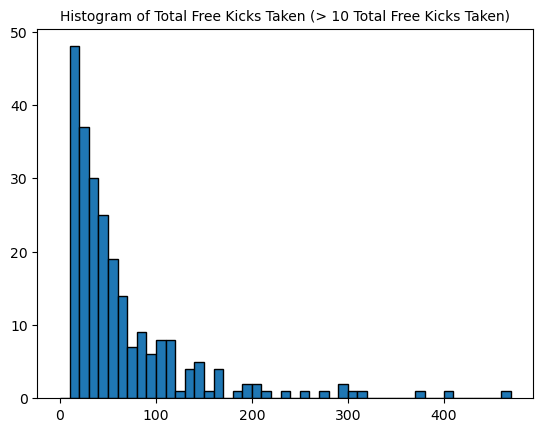

In [68]:
#removing observations with less than 10 free kicks taken 
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 10]

#replotting the histogram above
plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken (> 10 Total Free Kicks Taken)', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.show()

This plot sort of just looks like a mirror copy of the initial plot that didn't have observations with less than 10 free kicks removed. However, we can see that the pattern sort of levels out around 70 total free kicks taken. Based on this, let's replot again but removing observations with less than 70 free kicks taken. 

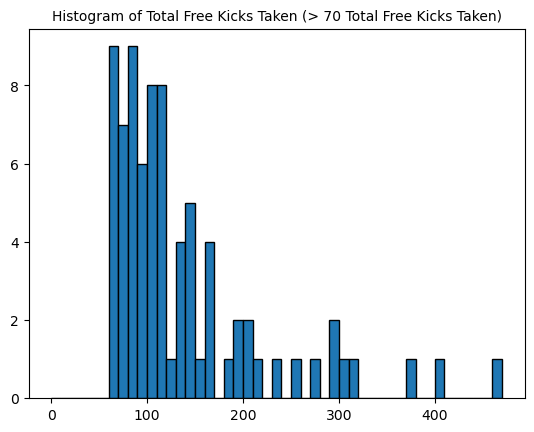

In [69]:
#removing observations with less than 60 free kicks taken 
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 60]

#replotting the histogram above
plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken (> 70 Total Free Kicks Taken)', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.show()

We now get the player id's for the players that have taken 60 or more free kicks in total. 

In [70]:
designated_fktaker_id = total_fkpass['Player ID']
print(designated_fktaker_id)

7        8
9       10
14      15
24      25
29      30
      ... 
496    497
511    512
517    518
524    525
525    526
Name: Player ID, Length: 78, dtype: int64


There are 78 players that we will regarded as designated free kick takers for their team, based on the filter we used. (an issue with this is that the filter was chosen very arbitrarily. For example, it may be the case that a given player only played 1 season, but was the designated free kick taker that season. However due to their limited number of appearances, their total free kicks was less than 60, so they were excluded.)

We now compare the assists recorded by observations with player id's associated with 'designated free kick taker', and observations with player id's not associated with designated free kick taker.

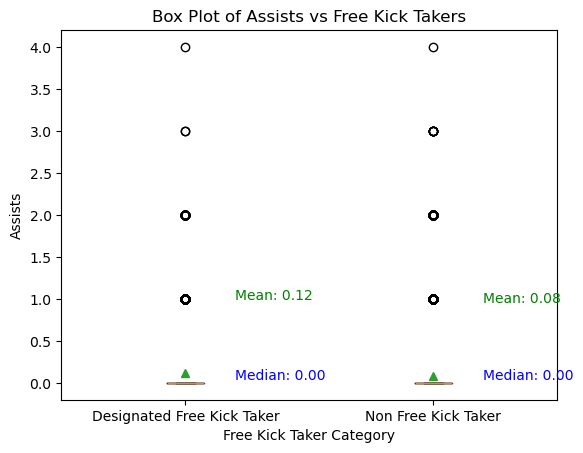

In [71]:
# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_fktaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_fktaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Free Kick Taker', 'Non Free Kick Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Free Kick Takers')
plt.xlabel('Free Kick Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

This boxplot shows that there is really minimal difference in the assists recorded when comparing designated free kick takers with non free kick takers. There is an argument which suggests that the current method we used to determine which Player ID's should be recorded as designated free kick takers is flawed. This is because we are essentially just including the Player ID's which have taken 60 or more free kicks in their careers. We mentioned previously that one of the flaws of this method is that it excludes players who are designated free kick takers, but are only in the league for a short period of time, meaning they don't have enough games to accumulate enough free kicks to be considered designated free kick takers. We can try calculate the proportion of observations that involve non-zero free kicks taken for each player, and this time record the players as designated free kick takers if a large proportion of their observations involves non-zero free kicks recorded. 

In [72]:
#filter for observations where Free Kick Pass is non-zero
nonzero_fkpass = att_explore[att_explore['Free Kick Pass'] > 0]

#count the number of non-zero Free Kick Pass observations for each Player ID
nonzero_counts = nonzero_fkpass.groupby('Player ID').size()

#count total games played for each Player ID
total_counts = att_explore.groupby('Player ID').size()

#calculate proportion of games with non-zero Free Kick Pass for each Player ID
proportion_fkpass = (nonzero_counts / total_counts).fillna(0) * 100  # Multiply by 100 to get percentage
print(proportion_fkpass)

Player ID
1       0.000000
2       4.347826
3      50.000000
4       0.000000
5      45.161290
         ...    
523     7.142857
524    76.470588
525    85.314685
526    58.474576
527    71.428571
Length: 527, dtype: float64


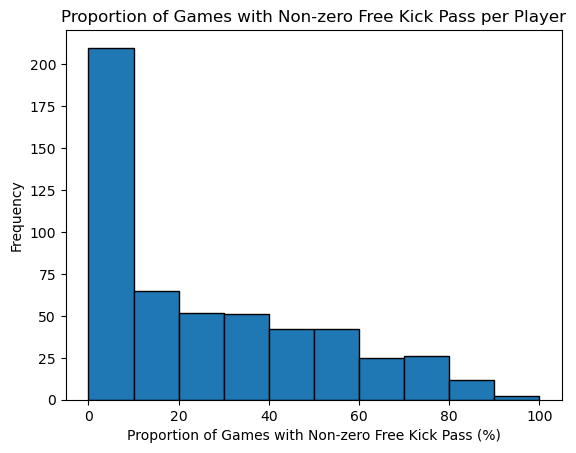

In [73]:
#plot the proportions
plt.figure()
plt.hist(proportion_fkpass, bins=range(0, 110, 10), edgecolor='black') 
plt.title('Proportion of Games with Non-zero Free Kick Pass per Player')
plt.xlabel('Proportion of Games with Non-zero Free Kick Pass (%)')
plt.ylabel('Frequency')
plt.show()

So just over 200 of the players that have taken at least 1 free kick in their career have only taken free kicks in less than 10% of the games they have played. We can probably exclude these Player ID's from the designated free kick takers list. We can probably include the rest in the list however.  

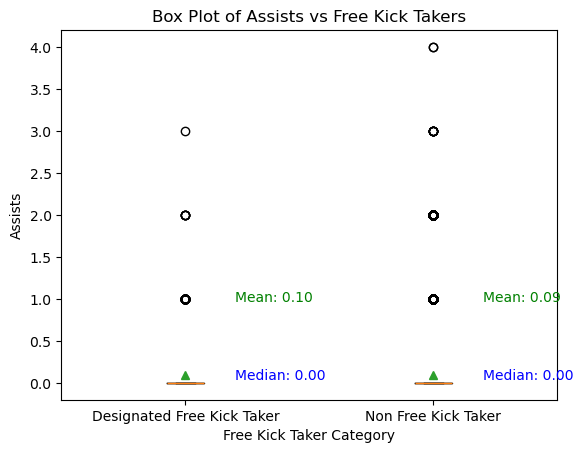

In [74]:
designated_fktaker_id = proportion_fkpass[proportion_fkpass > 10]

# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_fktaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_fktaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Free Kick Taker', 'Non Free Kick Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Free Kick Takers')
plt.xlabel('Free Kick Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

So when filtering using this criterion, we can see that the number of assists recorded when comparing the two categories are even more similar. The median number of assists is exactly the same, whilst the mean number of assists is only 0.01 higher for observations associated with Player ID's included amongst the designated free kick takers. Therefore, we can probably conclude that the effect of being a designated free kick taker on assists is minimal. 

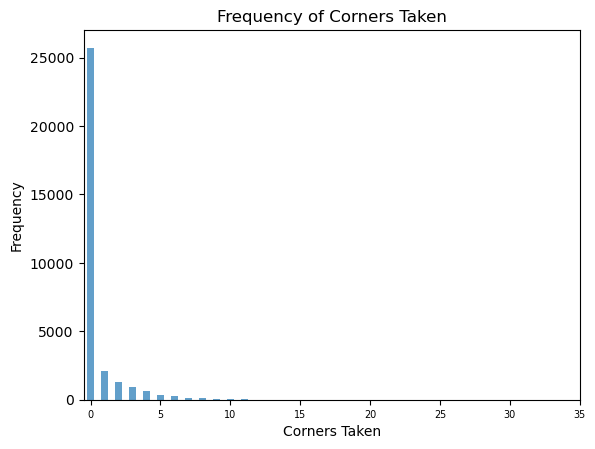

In [75]:
corners_count = att_explore['Corners Taken'].value_counts().sort_index()

fig, ax = plt.subplots()

corners_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Corners Taken')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Corners Taken')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, an overwhelming majority of the observations have 0 corners taken. 

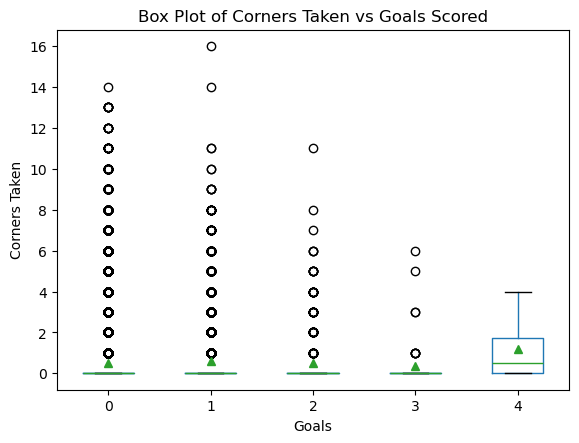

In [76]:
plt.figure
att_explore.boxplot(column = 'Corners Taken', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Corners Taken')
plt.show()

We see pretty consistent mean and median values for corners taken when comparing observations that have scored different numbers of goals. The plot appears to show that observations recording 4 goals have a higher median and mean value for corners taken, but this is probably just an outlier. 

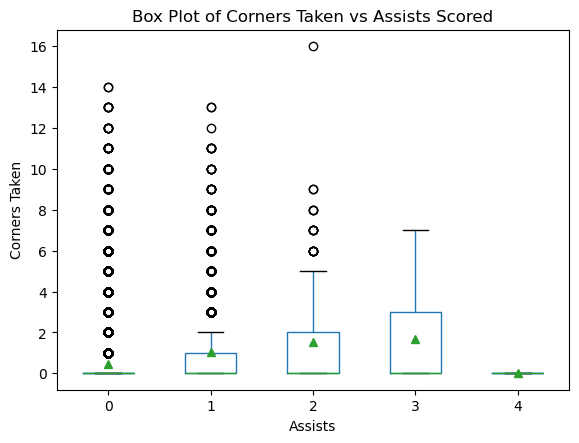

In [77]:
plt.figure
att_explore.boxplot(column = 'Corners Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Corners Taken')
plt.show()

This plot is interesting because it shows that the mean value for corners taken increases as the number of assists recorded increases (except for observations with 4 assists, but again this probably just an outlier). However, the median number of corners taken remains the across different number of assists. 

However, the fact that observations with 0 assists has a lower mean number of corners taken could be because of the large number of observations with both 0 assists and 0 corners taken skewing the mean. We can try remove the observations with corners taken equal to zero. 

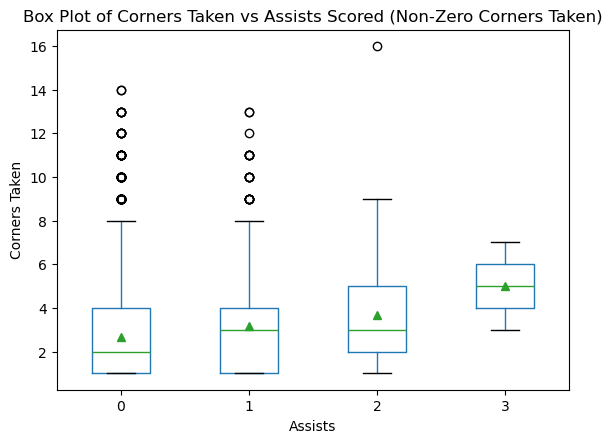

In [78]:
nonzerocorner_dat = att_explore[att_explore['Corners Taken'] > 0]

plt.figure
nonzerocorner_dat.boxplot(column = 'Corners Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Assists Scored (Non-Zero Corners Taken)')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Corners Taken')
plt.show()

This plot shows that there still appears to be a positive relationship between corners taken and assists recorded. 

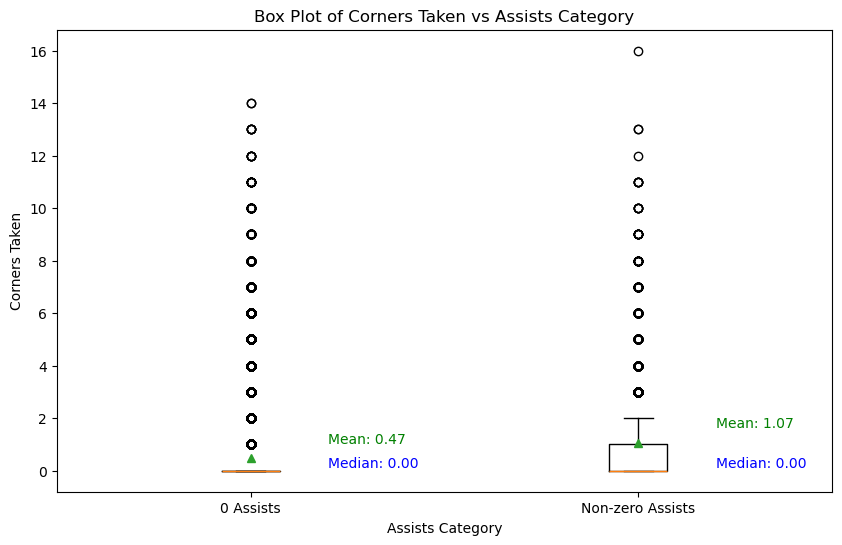

In [79]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Corners Taken'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Corners Taken']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Corners Taken vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Corners Taken')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations with more than 1 assist together and comparing it to the set of observations with no assists, we can see that the mean number of corners taken is higher for observations that recorded at least 1 assist. However, the median number is the same. 

We now want to do something similar where we identify Player ID's associated with designated corner takers, and then look at whether or not these Player ID's are more likely to record assists compared to non corner takers. 

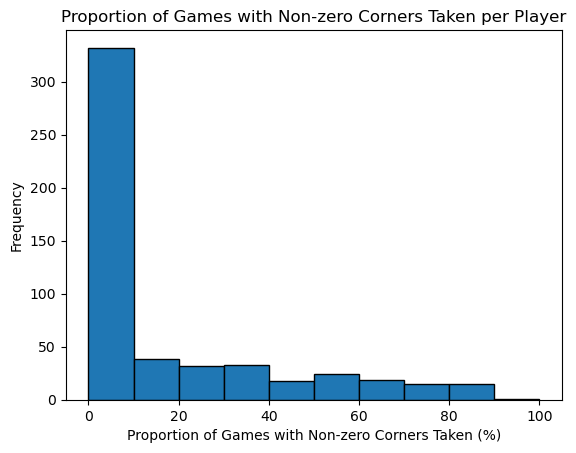

In [80]:
#filter for observations where Corners Taken is non-zero
nonzero_cornertaker = att_explore[att_explore['Corners Taken'] > 0]

#count the number of non-zero Corners Taken observations for each Player ID
nonzero_counts = nonzero_cornertaker.groupby('Player ID').size()

#count total games played for each Player ID
total_counts = att_explore.groupby('Player ID').size()

#calculate proportion of games with non-zero Corners Taken for each Player ID
proportion_cornertaker = (nonzero_counts / total_counts).fillna(0) * 100  # Multiply by 100 to get percentage

#plot the proportions
plt.figure()
plt.hist(proportion_cornertaker, bins=range(0, 110, 10), edgecolor='black') 
plt.title('Proportion of Games with Non-zero Corners Taken per Player')
plt.xlabel('Proportion of Games with Non-zero Corners Taken (%)')
plt.ylabel('Frequency')
plt.show()

Similar to the Free Kicks Taken plot, we can see that 300+ of the players that have taken at least 1 corner have taken corners in less than 10% of the games they have played. We will adhere by the similar criteria and say that players that have taken corners in more than 10% of the games they have played will be recorded as designated corner takers. 

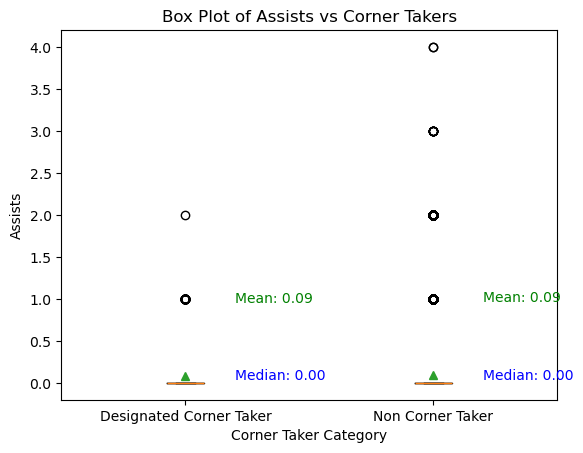

In [81]:
designated_cornertaker_id = proportion_cornertaker[proportion_cornertaker > 10]

# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_cornertaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_cornertaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Corner Taker', 'Non Corner Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Corner Takers')
plt.xlabel('Corner Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

However, it is super surprising to see that the mean number of assists recorded by players whose player ID is in the list of designated corner takers is has the same mean and median as player who are not regarded as designated corner takers. This contrasts both our expectation, as well as the results shown in the previous plots. Overall, we can probably conclude that being a corner taker has a minimal effect on whether or not a player is more likely to record an assist or not. Although taking corners does present an additional opportunity to get an assist, the quality of chance created directly from a corner is generally quite low. Although we saw that the mean number of corners taken is higher for observations with non-zero number of assists, this is probably because of the small number of observations included in the set of observations with non-zero assists. In contrast, the set of observations with number of assists = 0 also has a large number of observations with corners taken = 0 (we saw that the number of corners taken is very much skewed to the right), which means the mean will be skewed towards zero. 

#### Through Balls 

A through ball is recorded if a player completes a pass which is sent behind defenders into open space. In general, we expect the more creative players to record more through balls. However, the relationship between through balls and assists is unclear. We don't really expect through balls to have much relatioship with goals scored. This is because we generally expect midfielders to perform more through balls than attackers. 

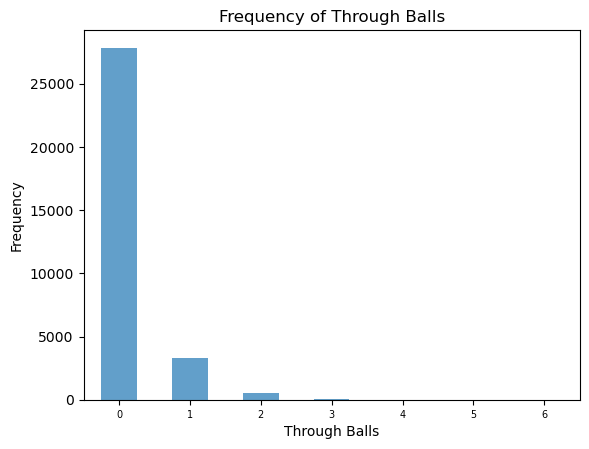

In [82]:
throughball_count = att_explore['Through Balls'].value_counts().sort_index()

fig, ax = plt.subplots()

throughball_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Through Balls')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Through Balls')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, we see that the majority of observations recorded no through balls. The fact that the maximum value for through balls amongst all of the observations is 6 tells us that through balls are generally quite rare. 

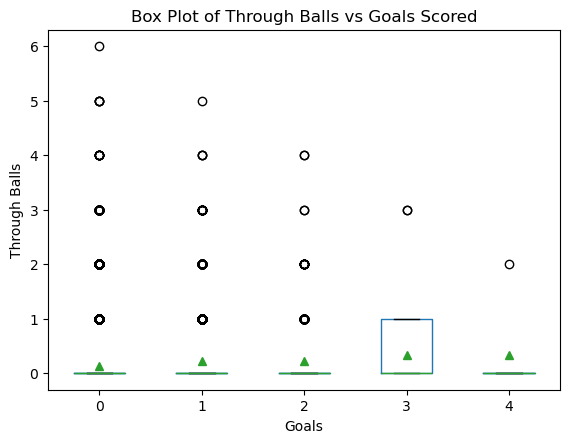

In [83]:
plt.figure
att_explore.boxplot(column = 'Through Balls', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Through Balls vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Through Balls')
plt.show()

This boxplot shows that the number of through balls recorded is pretty much the same when comparing observations with different number of goals scored. As we speculated, this is not particularly surprising. Let's also try group the observations by whether or not they recorded a non-zero value for through balls, and have a look at the median/mean goals scored when applying this grouping. 

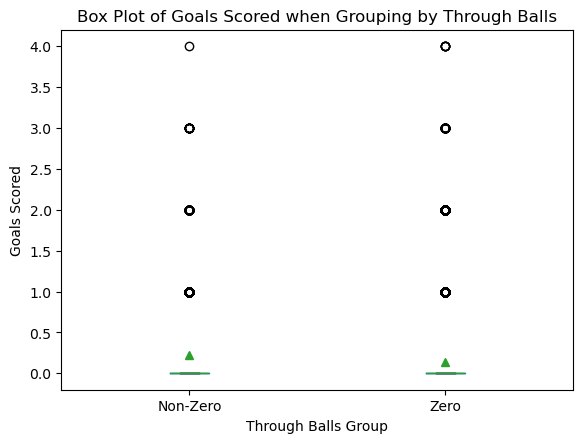

In [84]:
data = {
    'Through Balls': att_explore['Through Balls'],
    'Goals': att_explore['Goals']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Through Balls' is zero or not
df['Through Balls Group'] = df['Through Balls'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Goals', by = 'Through Balls Group', grid = False, showmeans = True)
plt.title('Box Plot of Goals Scored when Grouping by Through Balls')
plt.suptitle('')
plt.xlabel('Through Balls Group')
plt.ylabel('Goals Scored')
plt.show()

Here, we can see that the distribution of goals is pretty much the same when performing this grouping. Therefore, we can conclude that Through Balls probably doesn't have any significant relationship with goals.

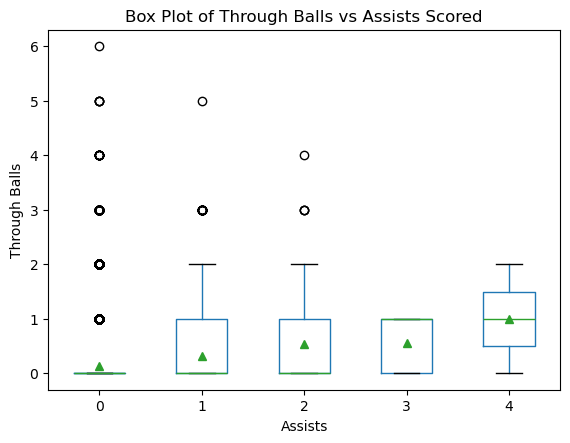

In [85]:
plt.figure
att_explore.boxplot(column = 'Through Balls', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Through Balls vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Through Balls')
plt.show()

Here, it appears as if there is some relationship between the number of through balls recorded and assists accumulated. Although the median values are the same when comparing observations with 0, 1 and 2 assists, then mean number of through balls is clearly increasing as the number of assists increases. 

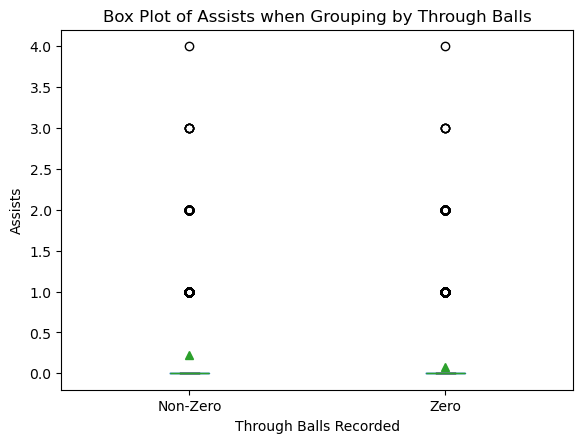

In [86]:
data = {
    'Through Balls': att_explore['Through Balls'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Through Balls' is zero or not
df['Through Balls Group'] = df['Through Balls'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Through Balls Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Through Balls')
plt.suptitle('')
plt.xlabel('Through Balls Recorded')
plt.ylabel('Assists')
plt.show()

When grouping the observations by whether or not a non-zero value for through balls was recorded, we can see that the mean number of assists is higher for the observations that recorded non-zero values for through balls. The median value is still at zero though.

#### Passes Offside

It is worth exploring the relationship between Through Balls and Passes Offside because there is justification to suggest that these two features are intrinsically linked. Passes Offside refers to the number of times a player makes a pass to a player that is offside. Therefore, the only difference between a through ball and a pass offside is whether or not the player receiving the ball is onside or offside. Based on this, we expect Through Balls and Passes Offside to be closely related. We can investigate this by constructing a scatter plot of Through Balls vs Passes Offside.

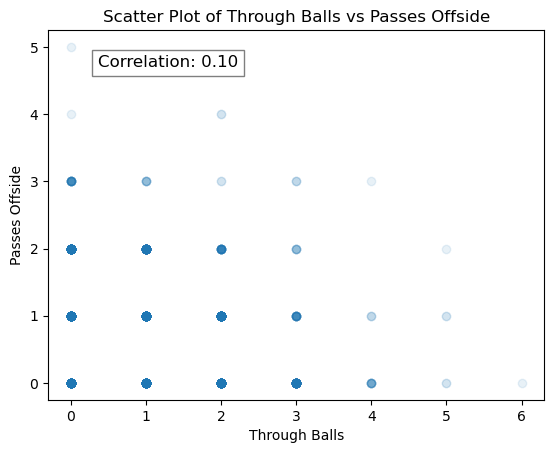

In [87]:
#calculate the correlation
correlation = att_explore['Through Balls'].corr(att_explore['Passes Offside'])

plt.figure()
plt.scatter(att_explore['Through Balls'], att_explore['Passes Offside'], alpha=0.1)
plt.title(f'Scatter Plot of Through Balls vs Passes Offside')
plt.xlabel('Through Balls')
plt.ylabel('Passes Offside')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

The scatter plot above shows that against our expectation, there is actually a limited relationship between Through Balls and Passes Offside. We can see this both visually, as well as by the correlation value that is calculated. We can now have a quick look at the relationship between Passes Offside and Goals/Assists. 

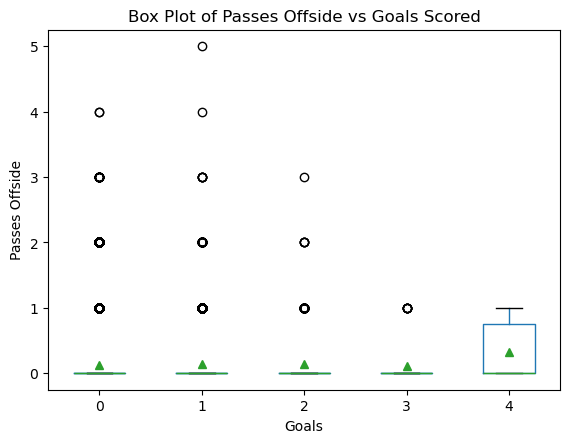

In [88]:
plt.figure
att_explore.boxplot(column = 'Passes Offside', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Passes Offside vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes Offside')
plt.show()

This boxplot shows that there doesn't appear to be any relationship between Goals and Passes Offside. We can see that the boxplots look almost identical when grouping observations by the number of goals scored. However, when looking at features such as this one where majority of the observations have a value equal to zero, it is worth grouping them by whether or not the value recorded is zero or non-zero, just as we did when looking at the through balls feature. 

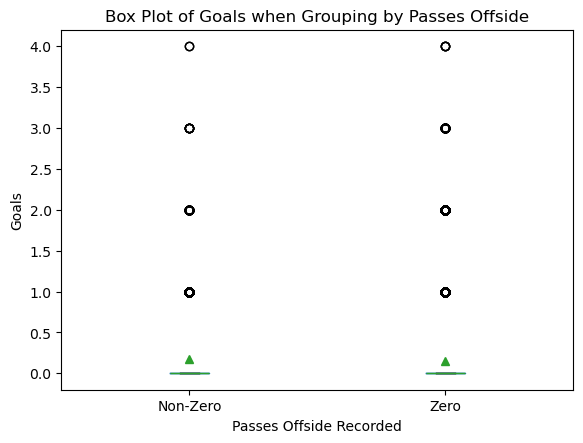

In [89]:
data = {
    'Passes Offside': att_explore['Passes Offside'],
    'Goals': att_explore['Goals']
}
df = pd.DataFrame(data)

#create a new column that indicates if 'Passes Offside' is zero or not
df['Passes Offside Group'] = df['Passes Offside'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

#create boxplot
plt.figure
df.boxplot(column = 'Goals', by = 'Passes Offside Group', grid = False, showmeans = True)
plt.title('Box Plot of Goals when Grouping by Passes Offside')
plt.suptitle('')
plt.xlabel('Passes Offside Recorded')
plt.ylabel('Goals')
plt.show()

Here, we can see that there is virtually no relationship between the number of passes offside recorded and the number of goals scored. 

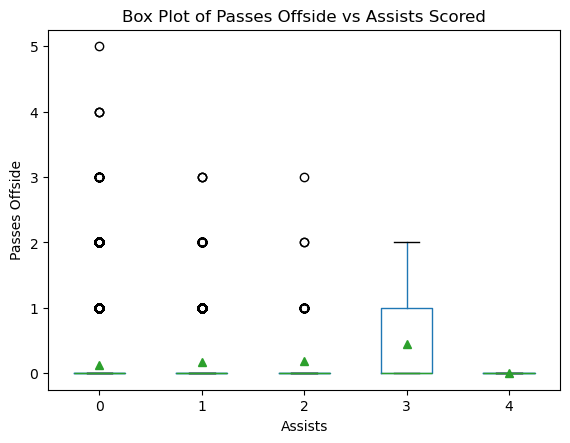

In [90]:
plt.figure
att_explore.boxplot(column = 'Passes Offside', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Passes Offside vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes Offside')
plt.show()

Here, this boxplot shows that there doesn't appear to be any relationship between the number of offside passes recorded and the number of assists accumulated. The plot does show that the mean number of passes offside is higher when 3 assists are recorded, but this is likely to be an outlier effect. 

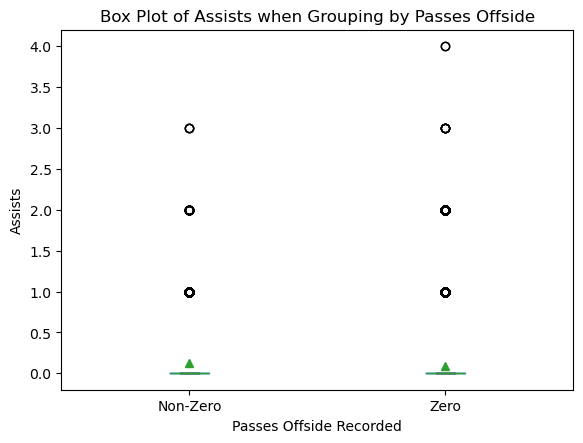

In [91]:
data = {
    'Passes Offside': att_explore['Passes Offside'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

#create a new column that indicates if 'Passes Offside' is zero or not
df['Passes Offside Group'] = df['Passes Offside'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

#create boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Passes Offside Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Passes Offside')
plt.suptitle('')
plt.xlabel('Passes Offside Recorded')
plt.ylabel('Assists')
plt.show()

When we again group observations by whether or not the number of passes offside is zero or non-zero, we can see that both the mean/median number of assists recorded when comparing these observations are pretty much the same. Therefore, we can conclude that Passes Offside is a feature that doesn't really have any relationship with either Goals or Assists. We should probably discard this feature. 

#### Switches

A switch is recorded if a player completes a pass that travels 40 yards or more across the pitch (sideways). In general, the players most likely to accumulate a high number of switches are midfielders (actually, defenders are more likely to record a higher number of switches compared to attackers). Therefore, we don't expect this to be a useful feature for predicting either Goals or Assists. 

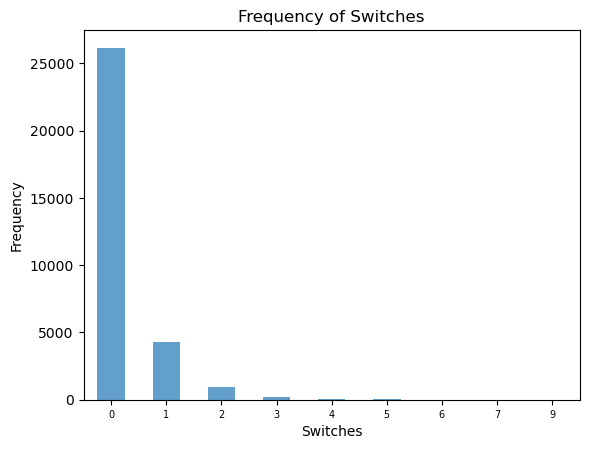

In [92]:
switches_count = att_explore['Switches'].value_counts().sort_index()

fig, ax = plt.subplots()

switches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Switches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Switches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Much like many of the features we have explored, the frequency plot for Switches is very much right-skewed. Majority of observations have completed 0 switches. This makes sense because tactically speaking, only certain players are in positions where a switch pass is necessary. For example if you are positioned in the centre of the pitch, it is unlikely that you will be able to record a lateral pass that goes far enough to be considered a switch. Likewise, switches rarely happen in the attacking third, which rules out wingers from making switches. It is only really players positioned relatively deep (defensive or middle third), who also constantly patrol the wide areas (full backs, midfielders who drop into wide areas to receive the ball) who are most likely to record a switch pass in the course of the game. 

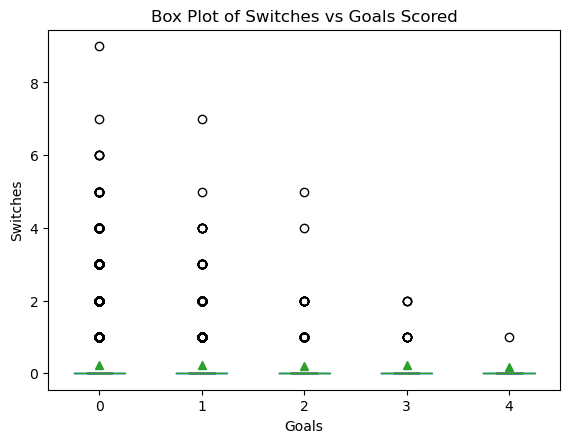

In [93]:
plt.figure
att_explore.boxplot(column = 'Switches', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Switches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Switches')
plt.show()

As expected, there doesn't appear to be any relationship between the number of switches recorded as the number of goals scored. 

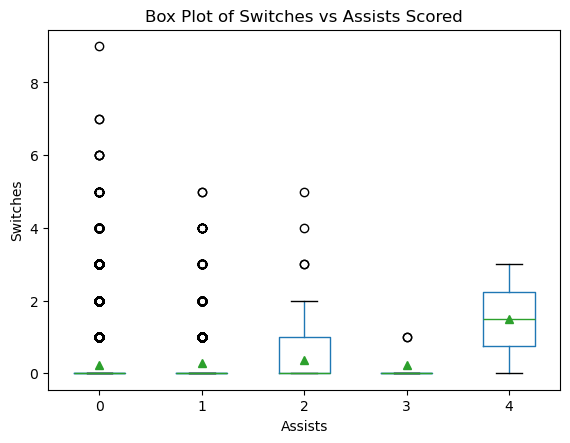

In [94]:
plt.figure
att_explore.boxplot(column = 'Switches', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Switches vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Switches')
plt.show()

Similarly, there also doesn't appear to be any relationship between the number of switches recorded and the number of assists. Although there is some slight deviation (the mean number of switches seems to be higher for observations with 2 assists and much higher for observations with 4 assists), these are probably just outliers. 

#### Crosses

Crosses is an interesting feature in terms of whether or not we expect there to be a relationship between the number of crosses recorded and goals/assists. First off, we don't really expect there to be much relationship between the crosses and goals. However, there may be a relationship between the number of crosses and assists. In general, the more crosses a player accumulates, the higher the probability of recording an assist. This is because we can view each cross as an opportunity to provide an assist. However, there is some debate as to the quality of chances created through crossing. In fact, the general consensus is that excessive crossing is a waste, because you are needlessly risking loss of possession for minimal gain in terms of chance creation. You are better off retaining possession of the ball, and looking to create a chance through alternative means. The material effect of this can be seen through the data, as the average number of crosses per game has been going down season on season, as more and more teams adopt data-driven techniques and methods to improve their game. 

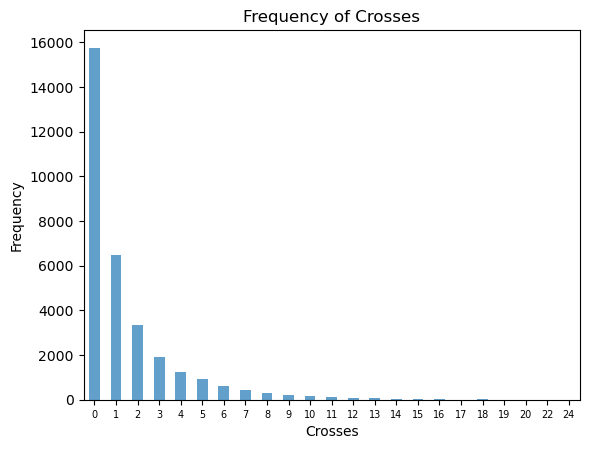

In [95]:
crosses_count = att_explore['Crosses'].value_counts().sort_index()

fig, ax = plt.subplots()

crosses_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Crosses')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Crosses')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Although majority of the observations recorded 0 assists, there is actually quite a good spread of crosses recorded. There is even an observation that recorded 24 assists in one game! 

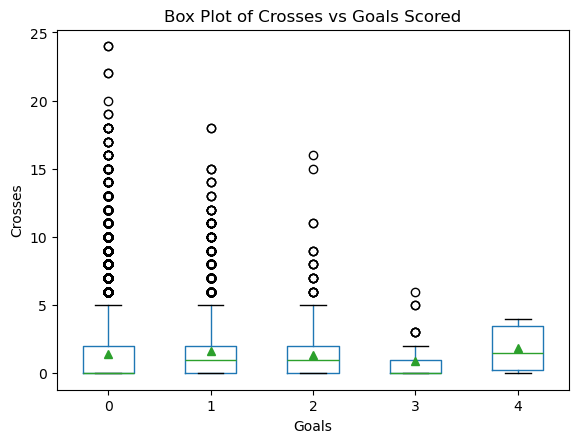

In [96]:
plt.figure
att_explore.boxplot(column = 'Crosses', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Crosses vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Crosses')
plt.show()

This boxplot shows that there doesn't appear to be any significant relationship between the number of crosses recorded and goals scored. This is waht we expected. 

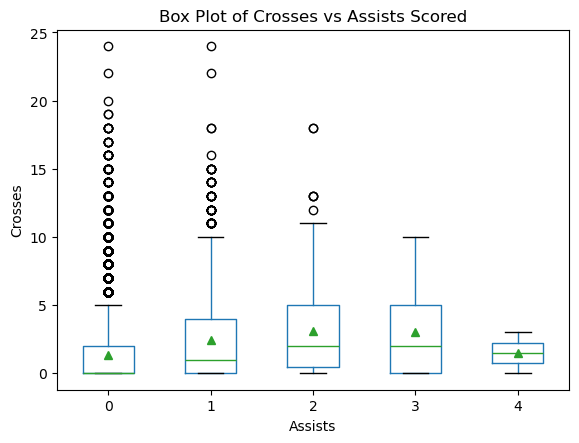

In [97]:
plt.figure
att_explore.boxplot(column = 'Crosses', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Crosses vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Crosses')
plt.show()

This boxplot shows that there is perhaps some relationship between the number of crosses recorded and assists. The mean number of assists seems to be higher for observations that recorded at least 1 assist, compared to the observations that recorded no assists. The median number of assists recorded also seems to be higher. 

What is interesting is that although there appears to be some relationship between 'Crosses' and 'Assists', we had previously concluded that there was no relationship between 'Crosses into the Penalty Area' and 'Assists'. Let's investigate this by looking at the relationship between 'Crosses' and 'Crosses into the Penalty Area'. 

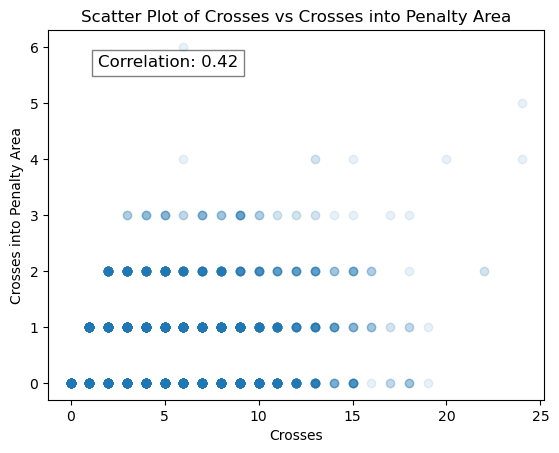

In [98]:
#calculate the correlation
correlation = att_explore['Crosses'].corr(att_explore['Crosses into Penalty Area'])

plt.figure()
plt.scatter(att_explore['Crosses'], att_explore['Crosses into Penalty Area'], alpha=0.1)
plt.title(f'Scatter Plot of Crosses vs Crosses into Penalty Area')
plt.xlabel('Crosses')
plt.ylabel('Crosses into Penalty Area')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

We can see that there is some relationship between these two features based on the scatter plot above. However, the correlation between these two features is only 0.42, which indicates that the relationship between them is not particularly strong. 

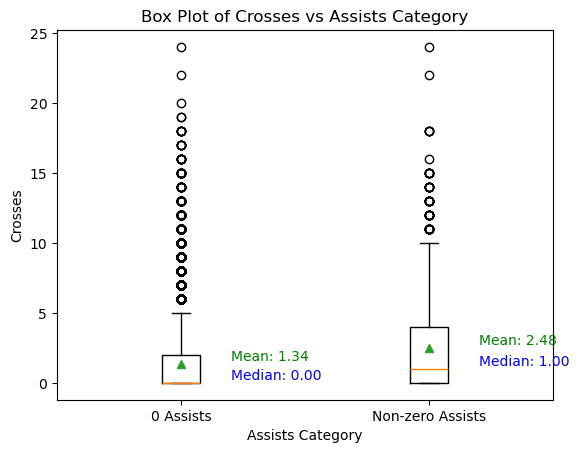

In [99]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Crosses'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Crosses']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Crosses')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations by whether or not the number of assists recorded is zero or non-zero, we can see that both the mean/median number of crosses is higher for observations that recorded non-zero assists. 

Let's now try remove the observations that recorded zero crosses.

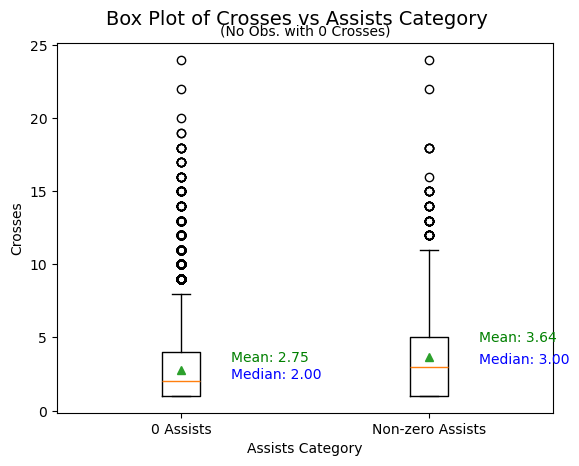

In [100]:
plt.figure()

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Crosses'] > 0)]['Crosses'],   # Assists == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Crosses'] > 0)]['Crosses']    # Assists != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Crosses)', fontsize = 10)
plt.suptitle('Box Plot of Crosses vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Crosses')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

When removing observations that recorded zero crosses, we can still see that the mean and median number of crosses recorded is higher for observations that recorded non-zero assists. This is significant because it tells us that there is probably a relationship between the number of crosses recorded and assists. 

It may not be immediately clear why removing the observations that recorded zero crosses is useful. The primary reason why we do this is because of the large number of observations that recorded zero crosses in the dataset. By removing the observations that have recorded zero assists, we are trying to remove the bias that may appear in our plots by including a large number of observations with zero crosses. What the plot above actually tells us is that the measures of central tendancy for crosses is higher for observations that recorded non-zero assists when there exists no observations that have a value of zero for crosses. So there is no downward bias being exhibited, so we are more sure that the central value for crosses is indeed higher when the number of assists accumulated is non-zero. 

It is still somewhat weird that there is some relationship between 'Assists' and 'Crosses', when we saw that there was no material link between 'Assists' and 'Crosses into Penalty Area'. If anything, we would expect there to be a stronger link between 'Crosses into Penalty Area' and 'Assists', because crosses into the penalty area are generally regarded as a measure of higher quality chances, when compared to a regular cross. What we didn't do before was group observations by whether or not they recorded a zero or non-zero value for crosses into the penalty area, and then looking at the distribution of assists when performing this grouping. We can try this now. 

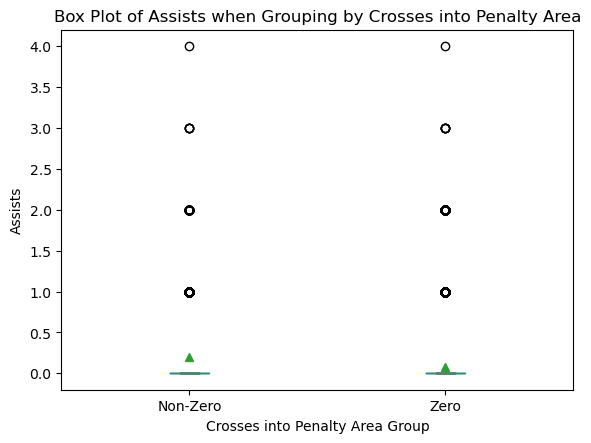

In [101]:
data = {
    'Crosses into Penalty Area': att_explore['Crosses into Penalty Area'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Crosses into Penalty Area' is zero or not
df['Crosses into Penalty Area Group'] = df['Crosses into Penalty Area'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Crosses into Penalty Area Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Crosses into Penalty Area')
plt.suptitle('')
plt.xlabel('Crosses into Penalty Area Group')
plt.ylabel('Assists')
plt.show()

This plot shows that the mean number of assists recorded is slightly higher when a non-zero number of crosses into the penalty area is recorded. However, there doesn't really appear to be a significant relationship here. 